# Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.



## Business Objectives


This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Data Understanding


This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

#### Importing the libraries 

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from 2 Files 

Application Data into app_data

Previous Applications Data into pre_app

In [3]:
app_data= pd.read_csv("application_data.csv", header = 0)
pre_app= pd.read_csv("previous_application.csv", header = 0)

In [4]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

### Analyzing Applications Data

In [6]:
#checking info of the Application Data
print(app_data.info(verbose = True, show_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
#Checking shape of app_data

app_data.shape

(307511, 122)

In [8]:
#Checking Sastical Summary of App_data

app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### Data Cleaning of Application Data

#### Missing Values

In [9]:
# Display Sum of missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# Display Percentage of Missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
100*app_data.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [11]:
## Shape of the DF before droping columns

app_data.shape

(307511, 122)

In [12]:
## Missing values

missing_values_app = 100*app_data.isnull().mean()

In [13]:
## Dropping the missing values above 40%

app_data.drop(missing_values_app[missing_values_app>40].keys(), axis=1, inplace=True)


In [14]:
## Shape of the DF after droping columns

app_data.shape

(307511, 73)

In [15]:
app_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [16]:
# Display Sum of missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [17]:
## Dropping Unnecessary Columns for better visbility 

In [18]:
col_app = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [19]:
app_data.drop(col_app, axis=1, inplace= True)

In [20]:
app_data.shape

(307511, 47)

In [21]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [22]:
# Display Sum of missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [23]:
## Checking on AMT_ANNUITY
##Loan annuity

app_data["AMT_ANNUITY"].value_counts()


9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
21775.5      643
29970.0      643
30528.0      626
45000.0      570
14350.5      564
32895.0      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
35937.0      418
24543.0      418
25321.5      417
24246.0      4

In [24]:
app_data["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

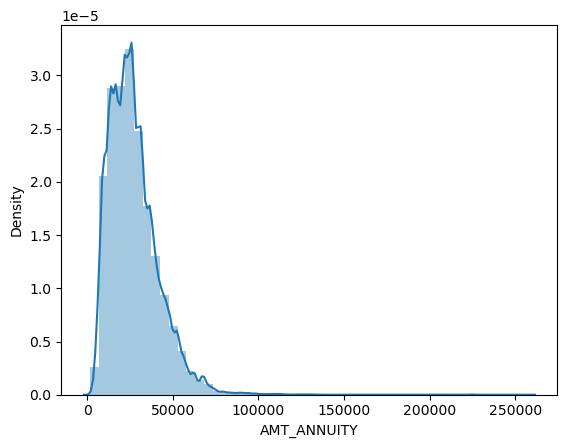

In [25]:
## Checking the Skewness of the AMT_ANNUITY

sns.distplot(app_data['AMT_ANNUITY']) 
plt.show()

In [26]:
# Fill NA with median as it is Skewed to Right.

app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(),inplace = True)


In [27]:
# Rechecking the Sum of Null Values

app_data.AMT_ANNUITY.isnull().sum()

0

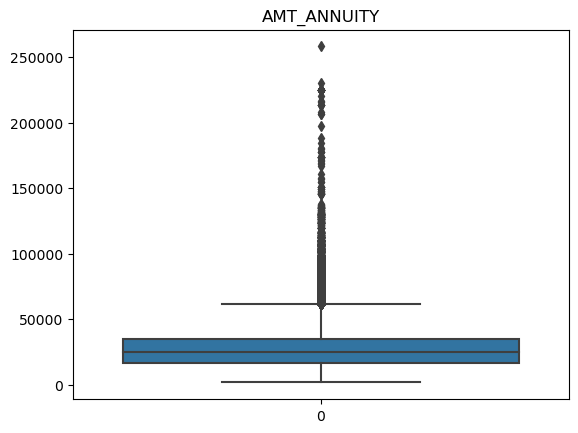

In [28]:
#Plotting a box plot to check outliers:
sns.boxplot(app_data["AMT_ANNUITY"])
plt.title("AMT_ANNUITY")
plt.show()

In [29]:
# Display Sum of missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [30]:
#Checking on AMT_GOODS_PRICE -For consumer loans it is the price of the goods for which the loan is given

app_data["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

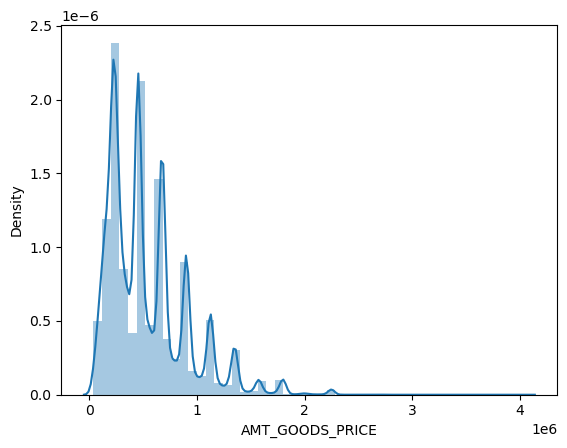

In [68]:
# Checking the Skewness of the AMT_GOODS_PRICE

sns.distplot(app_data['AMT_GOODS_PRICE']) 
plt.show()

In [31]:
# Fill NA with median as it is Skewed to Right.

app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(),inplace = True)


In [32]:
# Rechecking the Sum of Null Values

app_data.AMT_GOODS_PRICE.isnull().sum()

0

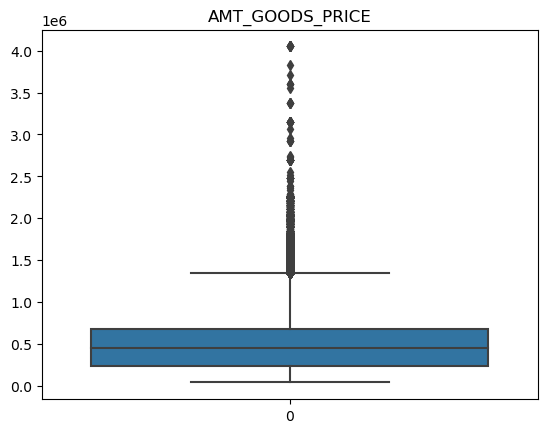

In [33]:
#Plotting a box plot to check outliers:
sns.boxplot(app_data["AMT_GOODS_PRICE"])
plt.title("AMT_GOODS_PRICE")
plt.show()

In [34]:
# Display Percentage of missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
100*app_data.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [35]:
# NAME_TYPE_SUITE has less than 1% of Missing values we can ignore or just drop it or apply mode as it is Categorical Variable
# Meaning of Variable - Who was accompanying client when he was applying for the loan

app_data.NAME_TYPE_SUITE.value_counts()



Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [36]:
app_data.NAME_TYPE_SUITE.mode()[0]


'Unaccompanied'

In [37]:
# Filling NA with Unaccompanied

app_data.NAME_TYPE_SUITE.fillna(app_data.NAME_TYPE_SUITE.mode()[0], inplace = True)


In [38]:
#Rechecking Null Values

app_data.NAME_TYPE_SUITE.isnull().sum()

0

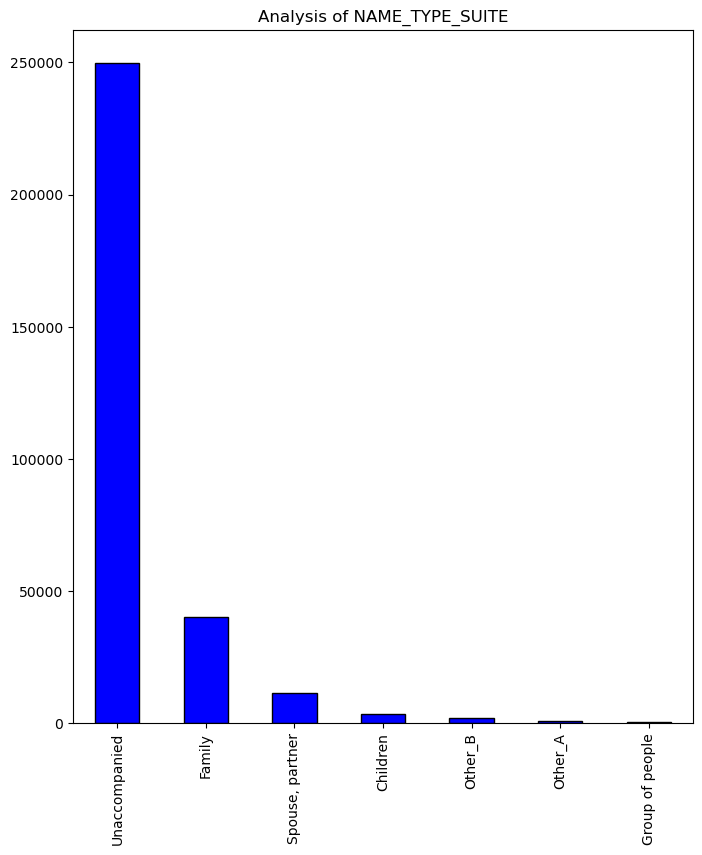

In [39]:
plt.figure(figsize=(8,9))
app_data.NAME_TYPE_SUITE.value_counts().plot.bar(edgecolor="black",color="blue")
plt.title("Analysis of NAME_TYPE_SUITE")
plt.show()

In [40]:
# Checking on OCCUPATION_TYPE
# Meaning of Variable - What kind of occupation does the client have

app_data.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [41]:
# Percentage of Missing Values
100*app_data.OCCUPATION_TYPE.isnull().mean()

31.345545362604916

In [42]:
app_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

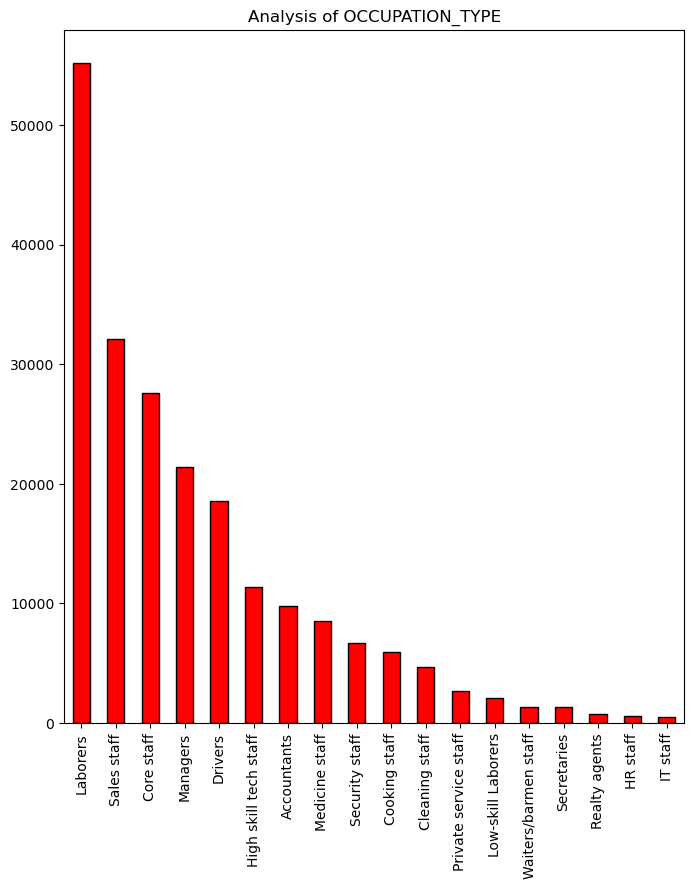

In [43]:
plt.figure(figsize=(8,9))
app_data.OCCUPATION_TYPE.value_counts().plot.bar(edgecolor="black",color="red")
plt.title("Analysis of OCCUPATION_TYPE")
plt.show()

# No modifications are made to the null values as we dont know their actual occupation and it will impact the analysis

In [44]:
app_data.head(11)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
8                Y             0          112500.0   1019610.0      33826.5   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied               Working   
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
8          913500.0         Children             Pensioner   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
1                Higher education               Married  House / apartment   
2   Secondary / secondary special  Single / not married  House / apartment   
3   Secondary / secondary special        Civil marriage  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
8   Secondary / secondary special               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
1                     0.003541      -16765          -1188            -1186.0   
2                     0.010032      -19046           -225            -4260.0   
3                     0.008019      -19005          -3039            -9833.0   
4                     0.028663      -19932          -3038            -4311.0   
5                     0.035792      -16941          

In [45]:
## Working on negative Values at DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

#Converting these values to (+)ve values:
app_data["DAYS_BIRTH"] = app_data["DAYS_BIRTH"].abs()
app_data["DAYS_EMPLOYED"] = app_data["DAYS_EMPLOYED"].abs()
app_data["DAYS_REGISTRATION"] = app_data["DAYS_REGISTRATION"].abs()
app_data["DAYS_ID_PUBLISH"] = app_data["DAYS_ID_PUBLISH"].abs()
app_data["DAYS_LAST_PHONE_CHANGE"] = app_data["DAYS_LAST_PHONE_CHANGE"].abs()



In [46]:
#Checking if the values are corrected
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [47]:
app_data["TARGET"].value_counts()
#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


0    282686
1     24825
Name: TARGET, dtype: int64

#### Sanity Checks

In [48]:
## Checking Data Type of the each Column
app_data.dtypes

# No issues found with Data Type

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [49]:
## Checking Unique Values of the each Column

app_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [50]:
# Checking value of CODE_GENDER                         

app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [51]:
# replacing XNA with Mode Value

app_data.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [52]:
app_data.CODE_GENDER.mode()[0]

'F'

In [53]:
## Replacing the Value

app_data['CODE_GENDER'] = app_data.CODE_GENDER.apply(lambda x : 'F' if x=="XNA" else x)


In [54]:
#Cross checking the values
app_data.CODE_GENDER.value_counts()

#It got updated

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [55]:
# Describing the organization type column
# Meaning - Type of organization where client works


app_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

Organization Type gas XNA of 18% of values(55374 rows are having 'XNA' values), thus dropping them.

In [56]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 47)

In [57]:
app_data['ORGANIZATION_TYPE'].describe()

count                     252137
unique                        57
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

#### Data Segmentation

In [58]:
cat_cols = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]
num_cols = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",]

#### Data Imbalance of Target

In [59]:
app_data["TARGET"].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

In [60]:
100 * app_data['TARGET'].value_counts() / len(app_data['TARGET'])

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

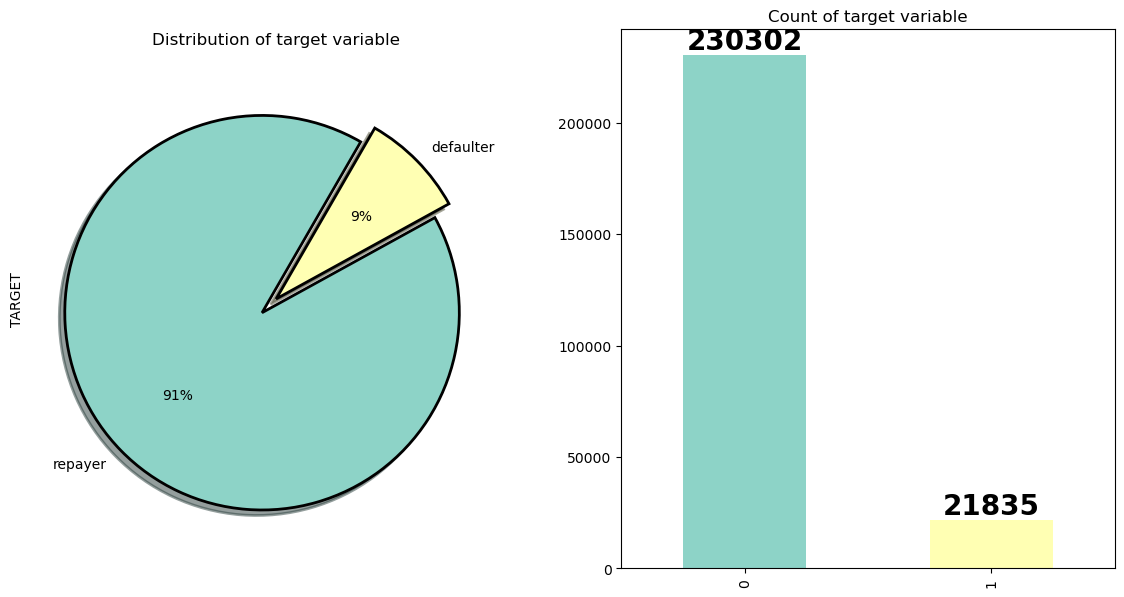

In [61]:
# Create a figure with a specified size
plt.figure(figsize=(14, 7))

# Subplot 1: Pie chart
plt.subplot(121)
app_data["TARGET"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=sns.color_palette("Set3", 2),  # Change color palette to Set3
    startangle=60,
    labels=["repayer", "defaulter"],
    wedgeprops={"linewidth": 2, "edgecolor": "k"},
    explode=[0.1, 0],
    shadow=True
)
plt.title("Distribution of target variable")

# Subplot 2: Vertical bar chart (bar plot)
plt.subplot(122)
ax = app_data["TARGET"].value_counts().plot(kind="bar", color=sns.color_palette("Set3", 2))  # Change kind to "bar"

for i, j in enumerate(app_data["TARGET"].value_counts().values):
    ax.text(i, j, j, ha='center', va='bottom', weight="bold", fontsize=20)

plt.title("Count of target variable")

# Show the plot
plt.show()


Target Data is highly imbalanced with a ratio of 92:8. Most of the loans were paid back on time (target = 0).

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


### Analysis on Application Data

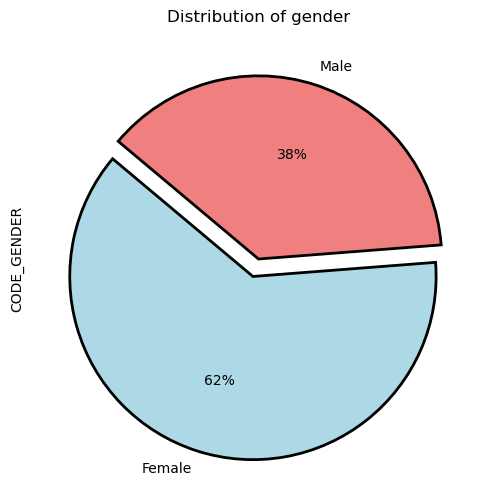

In [62]:
# Create a figure with a specified size
fig = plt.figure(figsize=(13, 6))

# Subplot 1: Pie chart
plt.subplot(121)
colors = ["lightblue", "lightcoral"]
explode = (0.1, 0)  # Explode the first slice for emphasis
app_data["CODE_GENDER"].value_counts().plot.pie(
    autopct="%1.0f%%",
    colors=colors,
    startangle=140,
    labels=["Female", "Male"],
    wedgeprops={"linewidth": 2, "edgecolor": "k"},  # Add shadow
    explode=explode  # Explode the first slice
)
plt.title("Distribution of gender")

# Show the plot
plt.show()

##### Derived Metrics

Creating bins or slots when analyzing income data can be useful for several reasons:

1. Data Simplification: Income data can be highly granular and can vary widely. Binning the data allows you to group similar income levels together, simplifying the analysis. This is especially helpful when you have a large dataset with many unique income values.

2. Visualization: Binning income data makes it easier to create visualizations like histograms, bar charts, or box plots. Visualizing binned data can provide insights into the distribution of income levels and make it easier to identify patterns or trends.

Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' addressing the outliners

Creating Derived Metrics of 'AMT_INCOME_RANGE' and 'AMT_CREDIT_RANGE'

In [63]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [64]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

In [65]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target1=app_data.loc[app_data["TARGET"]==1]
target0=app_data.loc[app_data["TARGET"]==0]

In [194]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252137 non-null  int64   
 1   TARGET                       252137 non-null  int64   
 2   NAME_CONTRACT_TYPE           252137 non-null  object  
 3   CODE_GENDER                  252137 non-null  object  
 4   FLAG_OWN_CAR                 252137 non-null  object  
 5   FLAG_OWN_REALTY              252137 non-null  object  
 6   CNT_CHILDREN                 252137 non-null  int64   
 7   AMT_INCOME_TOTAL             252137 non-null  float64 
 8   AMT_CREDIT                   252137 non-null  float64 
 9   AMT_ANNUITY                  252137 non-null  float64 
 10  AMT_GOODS_PRICE              252137 non-null  float64 
 11  NAME_TYPE_SUITE              252137 non-null  object  
 12  NAME_INCOME_TYPE             252137 non-null

## Univariate Analysis of application data - Catergorical Data

In [160]:
## Creating Function to plot the count plot in logarithmic scale with specific combination and reuse it later for the analysis

In [66]:
def uniplot(df, col, title, hue=None):
    # Set Seaborn styles and plot settings
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Create a temporary Series from hue
    temp = pd.Series(data=hue)

    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Calculate the width of the figure based on unique values in the column and hue
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Use a logarithmic scale for the y-axis
    plt.yscale('log')

    # Set the title
    plt.title(title)

    # Create a countplot with specified data, column, order, hue, and color palette
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='crest')

    # Show the plot
    plt.show()


#### Categorical Univariant Analysis with Target 0 - with No Payment Difficulties

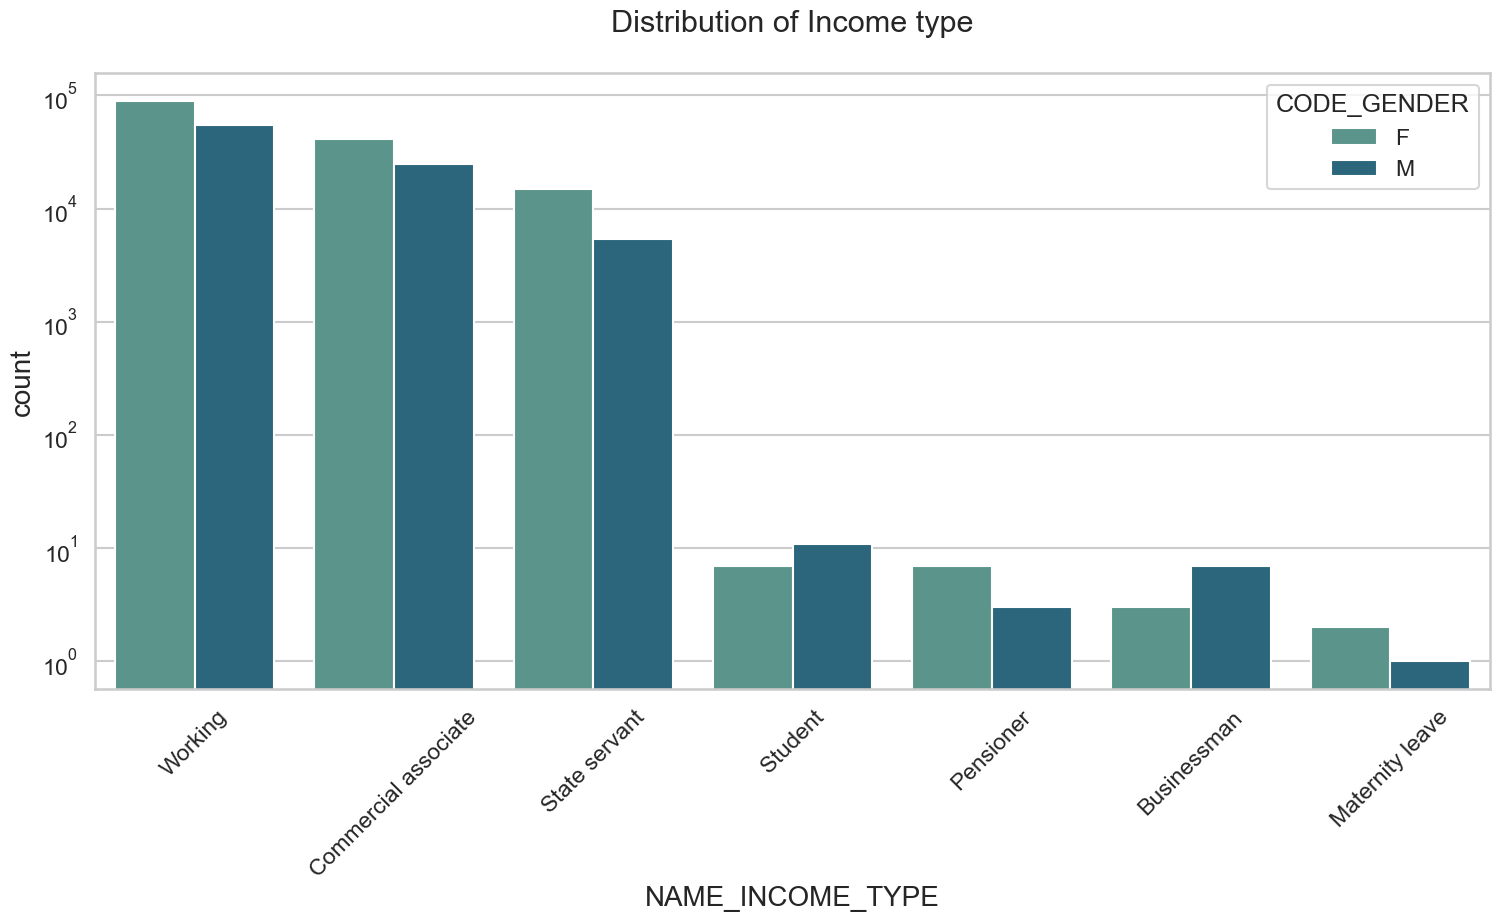

In [67]:
# Plotting for income type WRT target 0 - with no Payment difficulties

uniplot(target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Here are the key observations drawn from the graph:

1. The number of credits is notably higher for income types 'working,' 'commercial associate,' and 'State Servant' compared to the other categories.
2. Within these income types, females hold a greater number of credits than males.
3. Conversely, there is a lower count of credits associated with income types such as 'student,' 'pensioner,' 'Businessman,' and 'Maternity leave.'

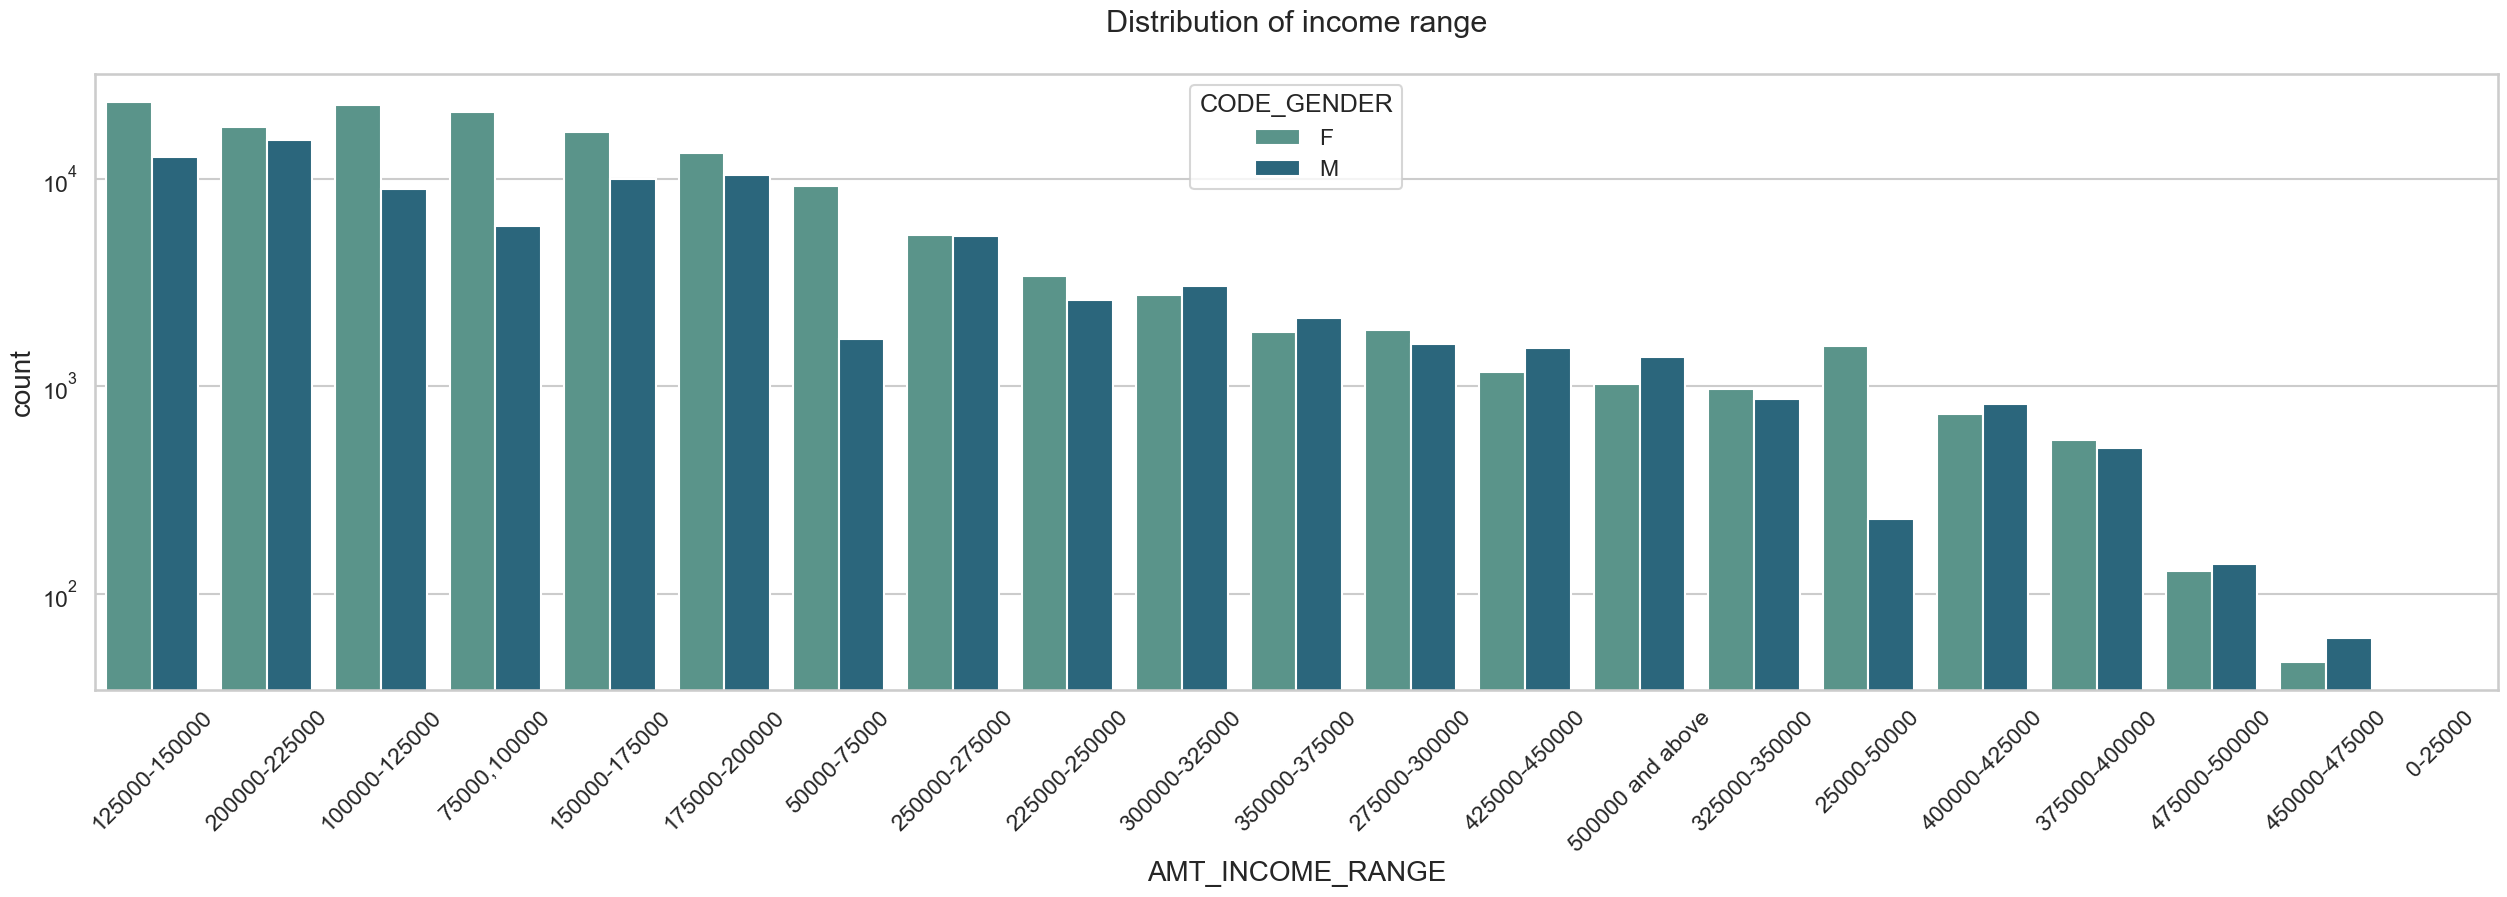

In [68]:
# Plotting for income range WRT target 0 - with no Payment difficulties

uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Key Takeaways from the Graph:

1. Females outnumber males.
2. The income range between 100,000 and 200,000 exhibits the highest number of credit cases with no payment difficulties.
3. The graph underscores that females dominate in the number of credits within this income range.
4. There is a notably low count of credits for individuals with an income range of 400,000 and above.


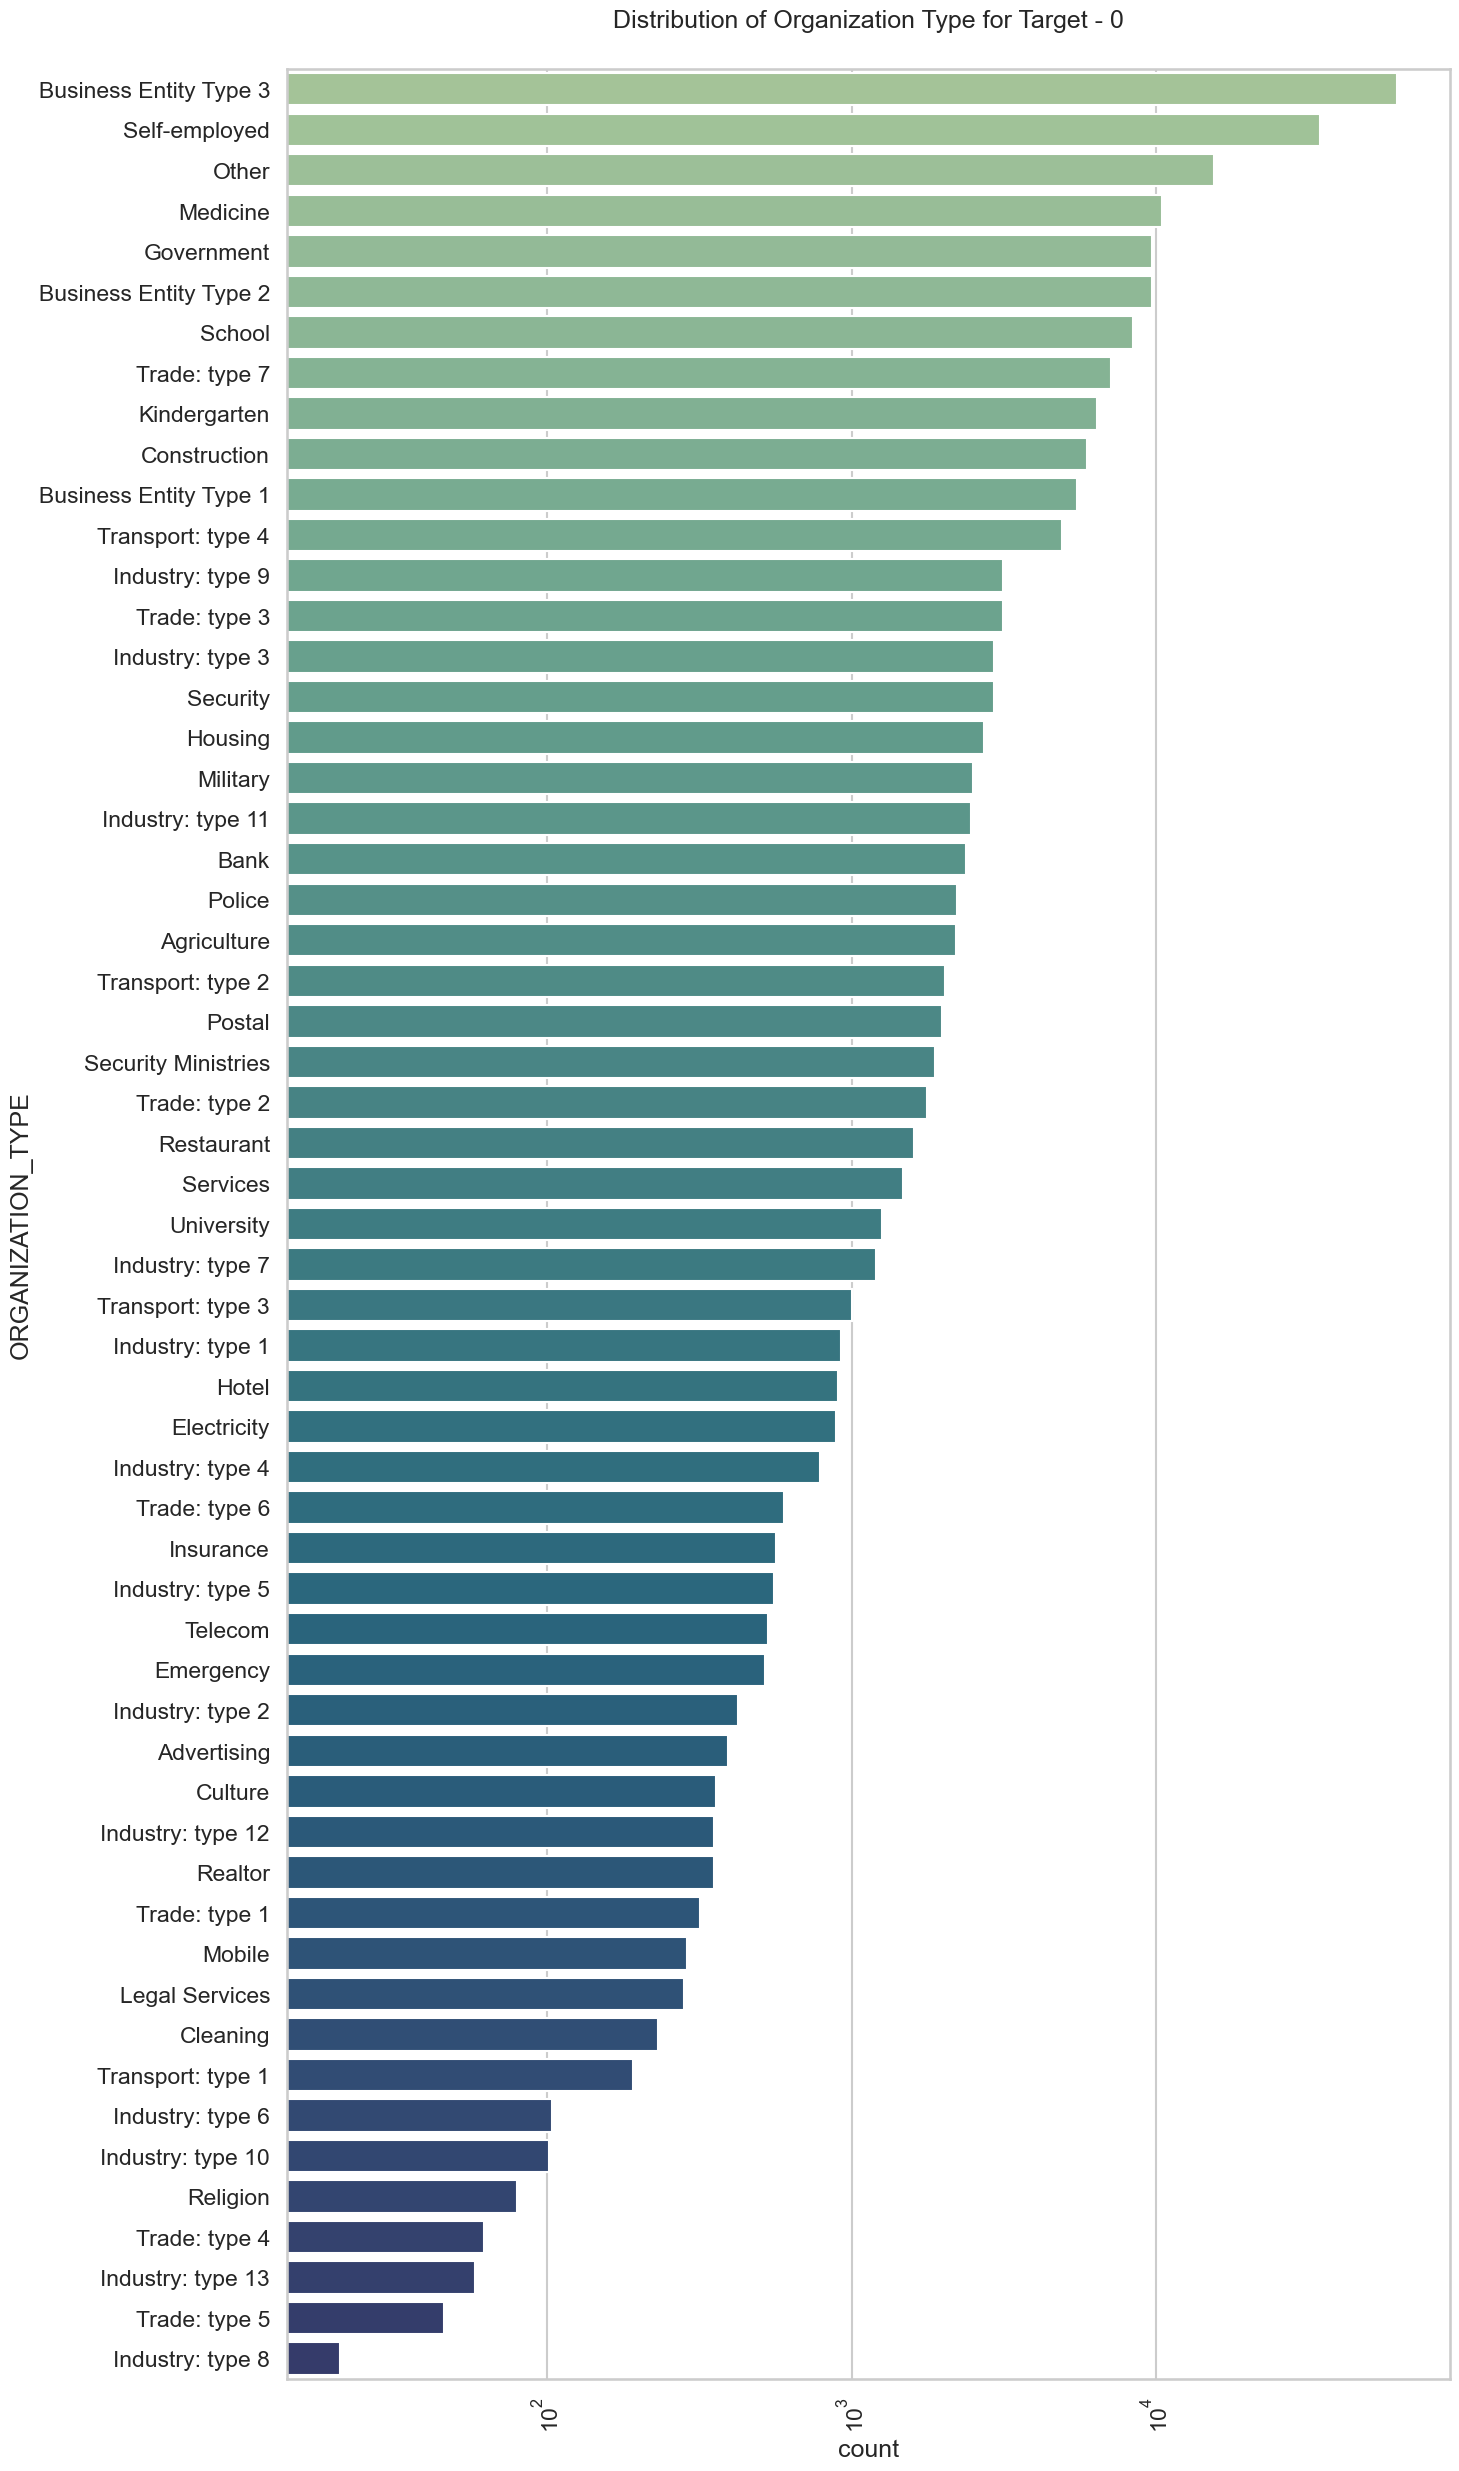

In [69]:
# Plotting for Organization type in logarithmic scale

# Set Seaborn styles and plot settings
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15, 30))  # Create a figure with a specified size

# Set the title
plt.title("Distribution of Organization Type for Target - 0")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Use a logarithmic scale for the x-axis
plt.xscale('log')

# Create a countplot with specified data, column, order, and color palette
sns.countplot(data=target0, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette='crest')

# Show the plot
plt.show()

Here are the key findings from the graph:

1. Clients who have applied for credits represent a majority of organization types, including 'Business entity Type 3,' 'Self-employed,' 'Other,' 'Medicine,' and 'Government.'
2. Conversely, there are fewer clients from organization types such as 'Industry type 8,' 'type 6,' 'type 10,' 'religion and trade type 5,' and 'type 4.'

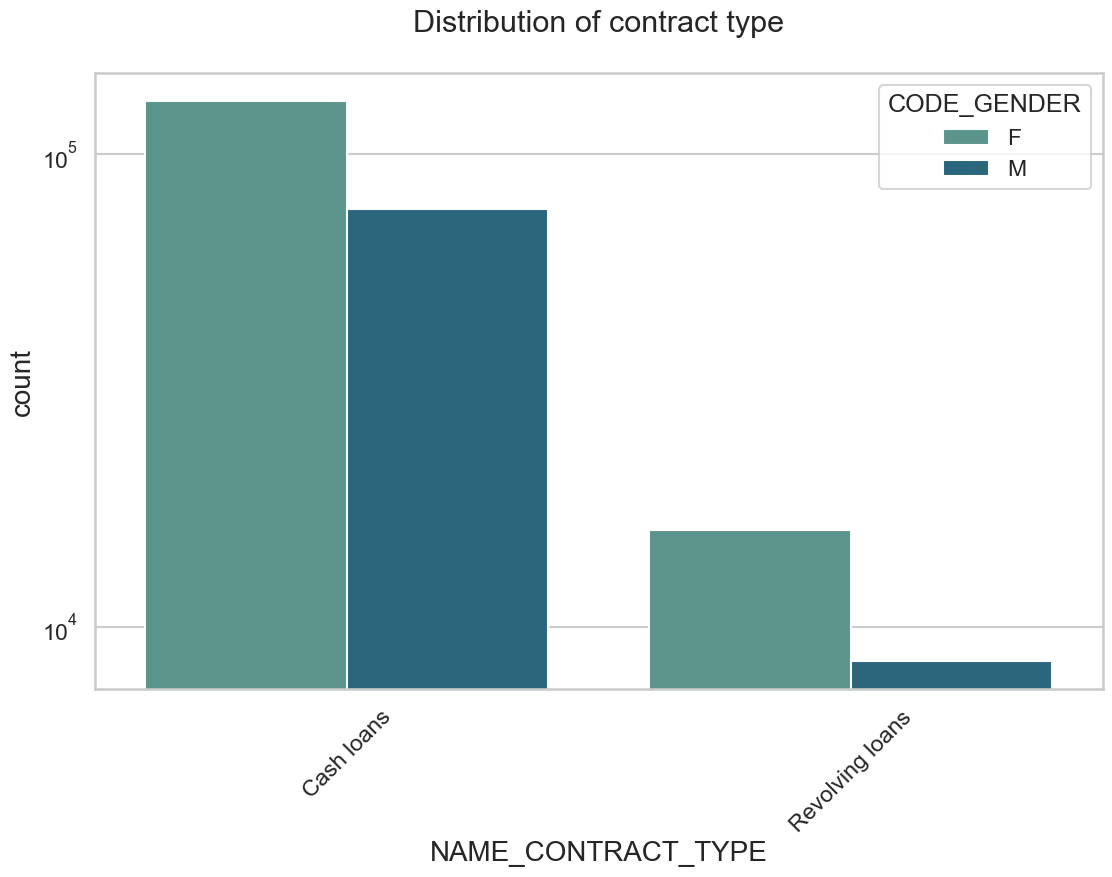

In [70]:
# Plotting for Contract type

uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')


Here are the key observations from the graph:

1. The 'cash loans' contract type has a higher number of credits compared to the 'Revolving loans' contract type.
2. Additionally, within both contract types, females lead in applying for credits

####  Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)

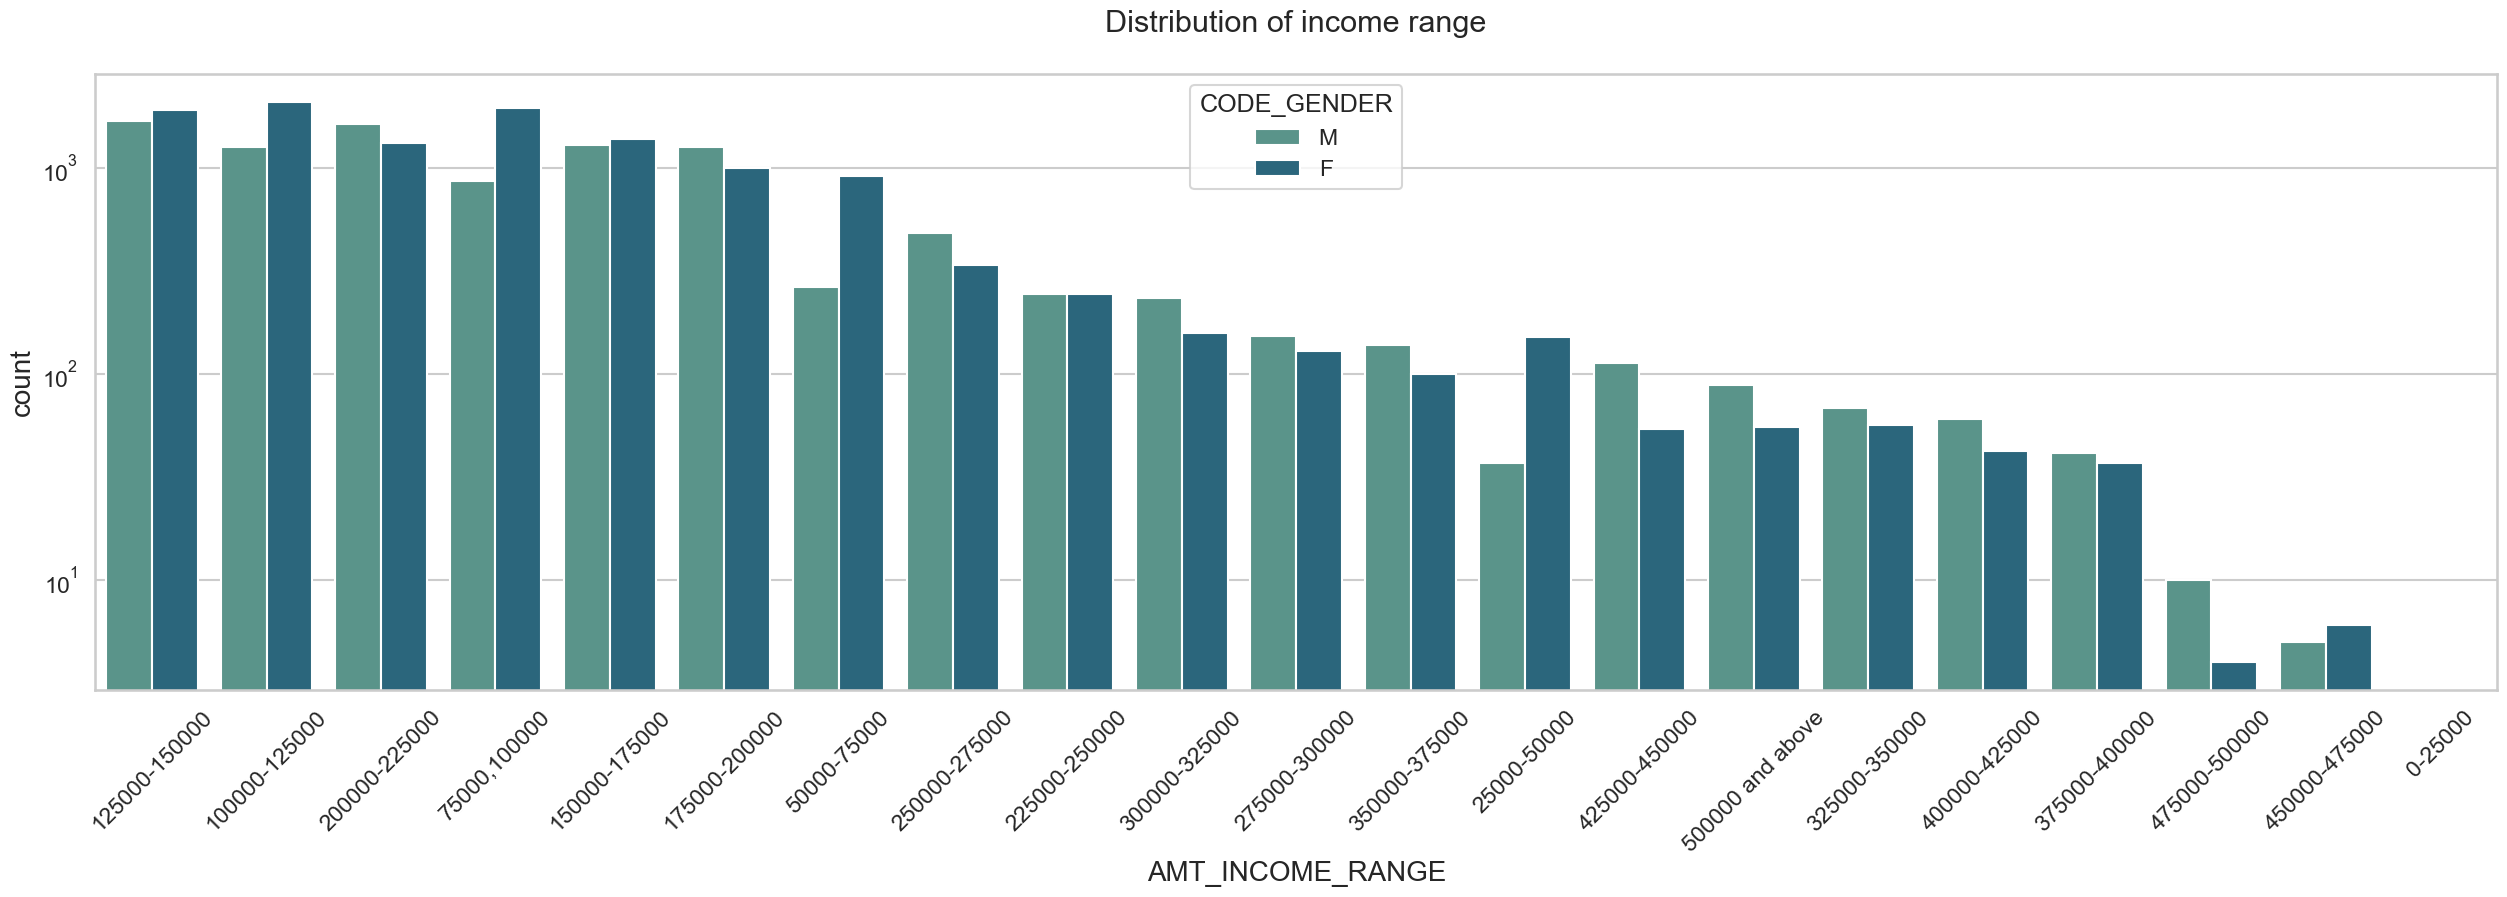

In [71]:
# Plotting for income range

uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Here are the key takeaways from the graph:

1. The count of males is greater than that of females.
2. The income range from 100,000 to 200,000 exhibits a higher number of credits.
3. Within this income range, the graph illustrates that males outnumber females in terms of credits.
4. Conversely, there is a notably low count of credits for individuals with an income range of 400,000 and above.

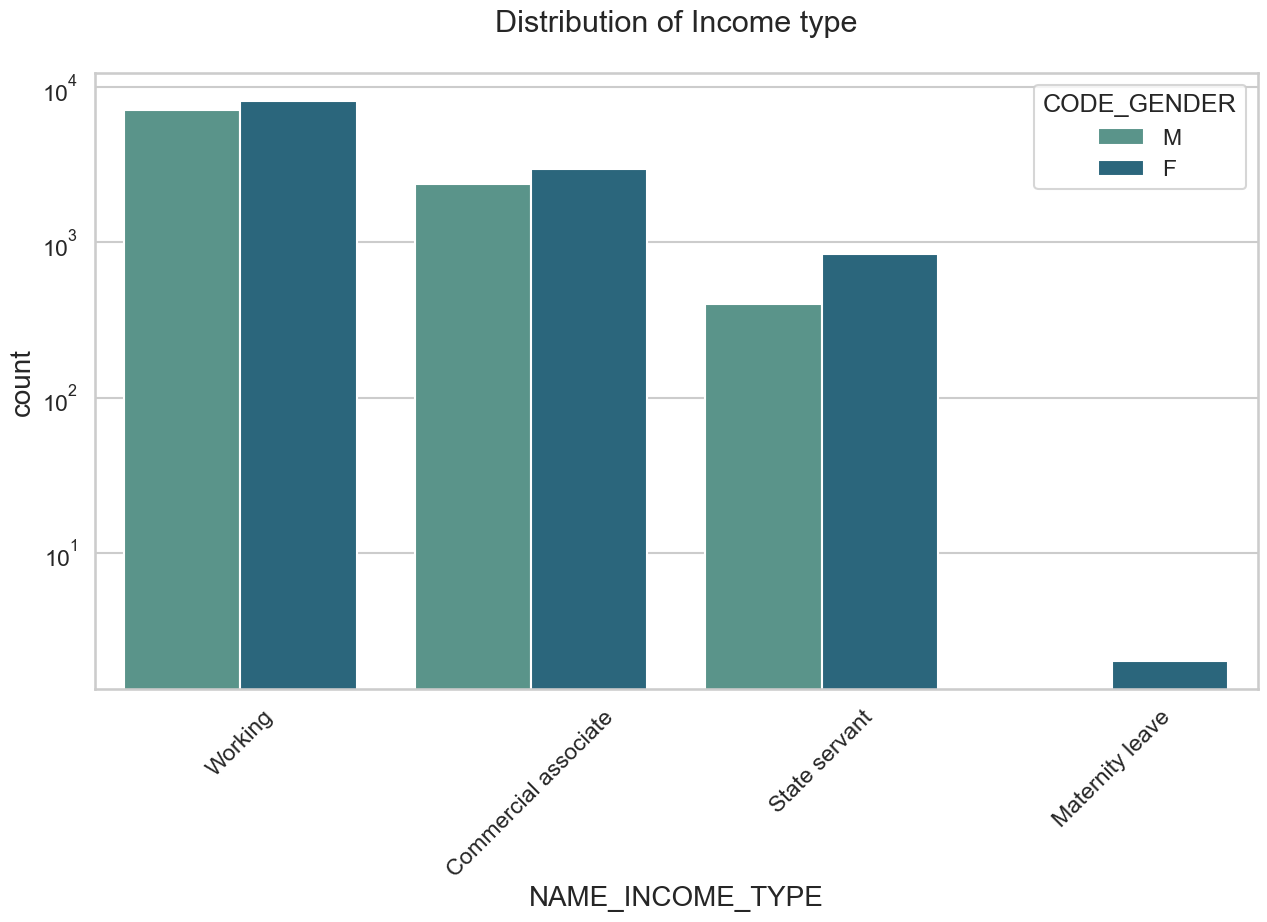

In [72]:
# Plotting for Income type

uniplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


Here are the key conclusions drawn from the above graph:

1. The number of credits is notably higher for income types 'working,' 'commercial associate,' and 'State Servant' compared to 'Maternity leave.'
2. Within these income types, females have a greater number of credits than males.
3. Conversely, there is a lower count of credits associated with the income type 'Maternity leave.'
4. For organization type 1, there are no instances of 'student,' 'pensioner,' and 'Businessman' income types, indicating that they do not have any late payments.

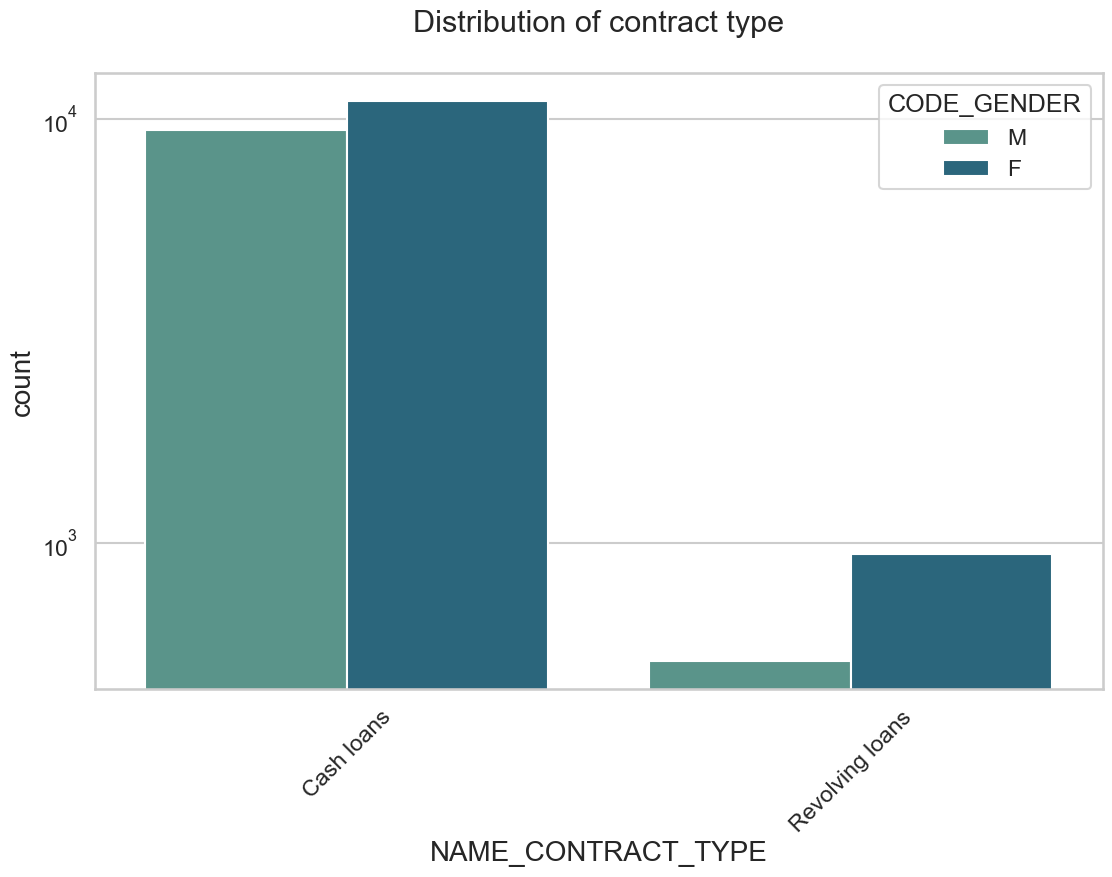

In [73]:
# Plotting for Contract type

uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Here are the key observations from the above graph:

1. The 'cash loans' contract type has a higher number of credits compared to the 'Revolving loans' contract type.
2. Additionally, within both contract types, females lead in applying for credits.
3. For organization type 1, there are only female applicants for 'Revolving loans.'

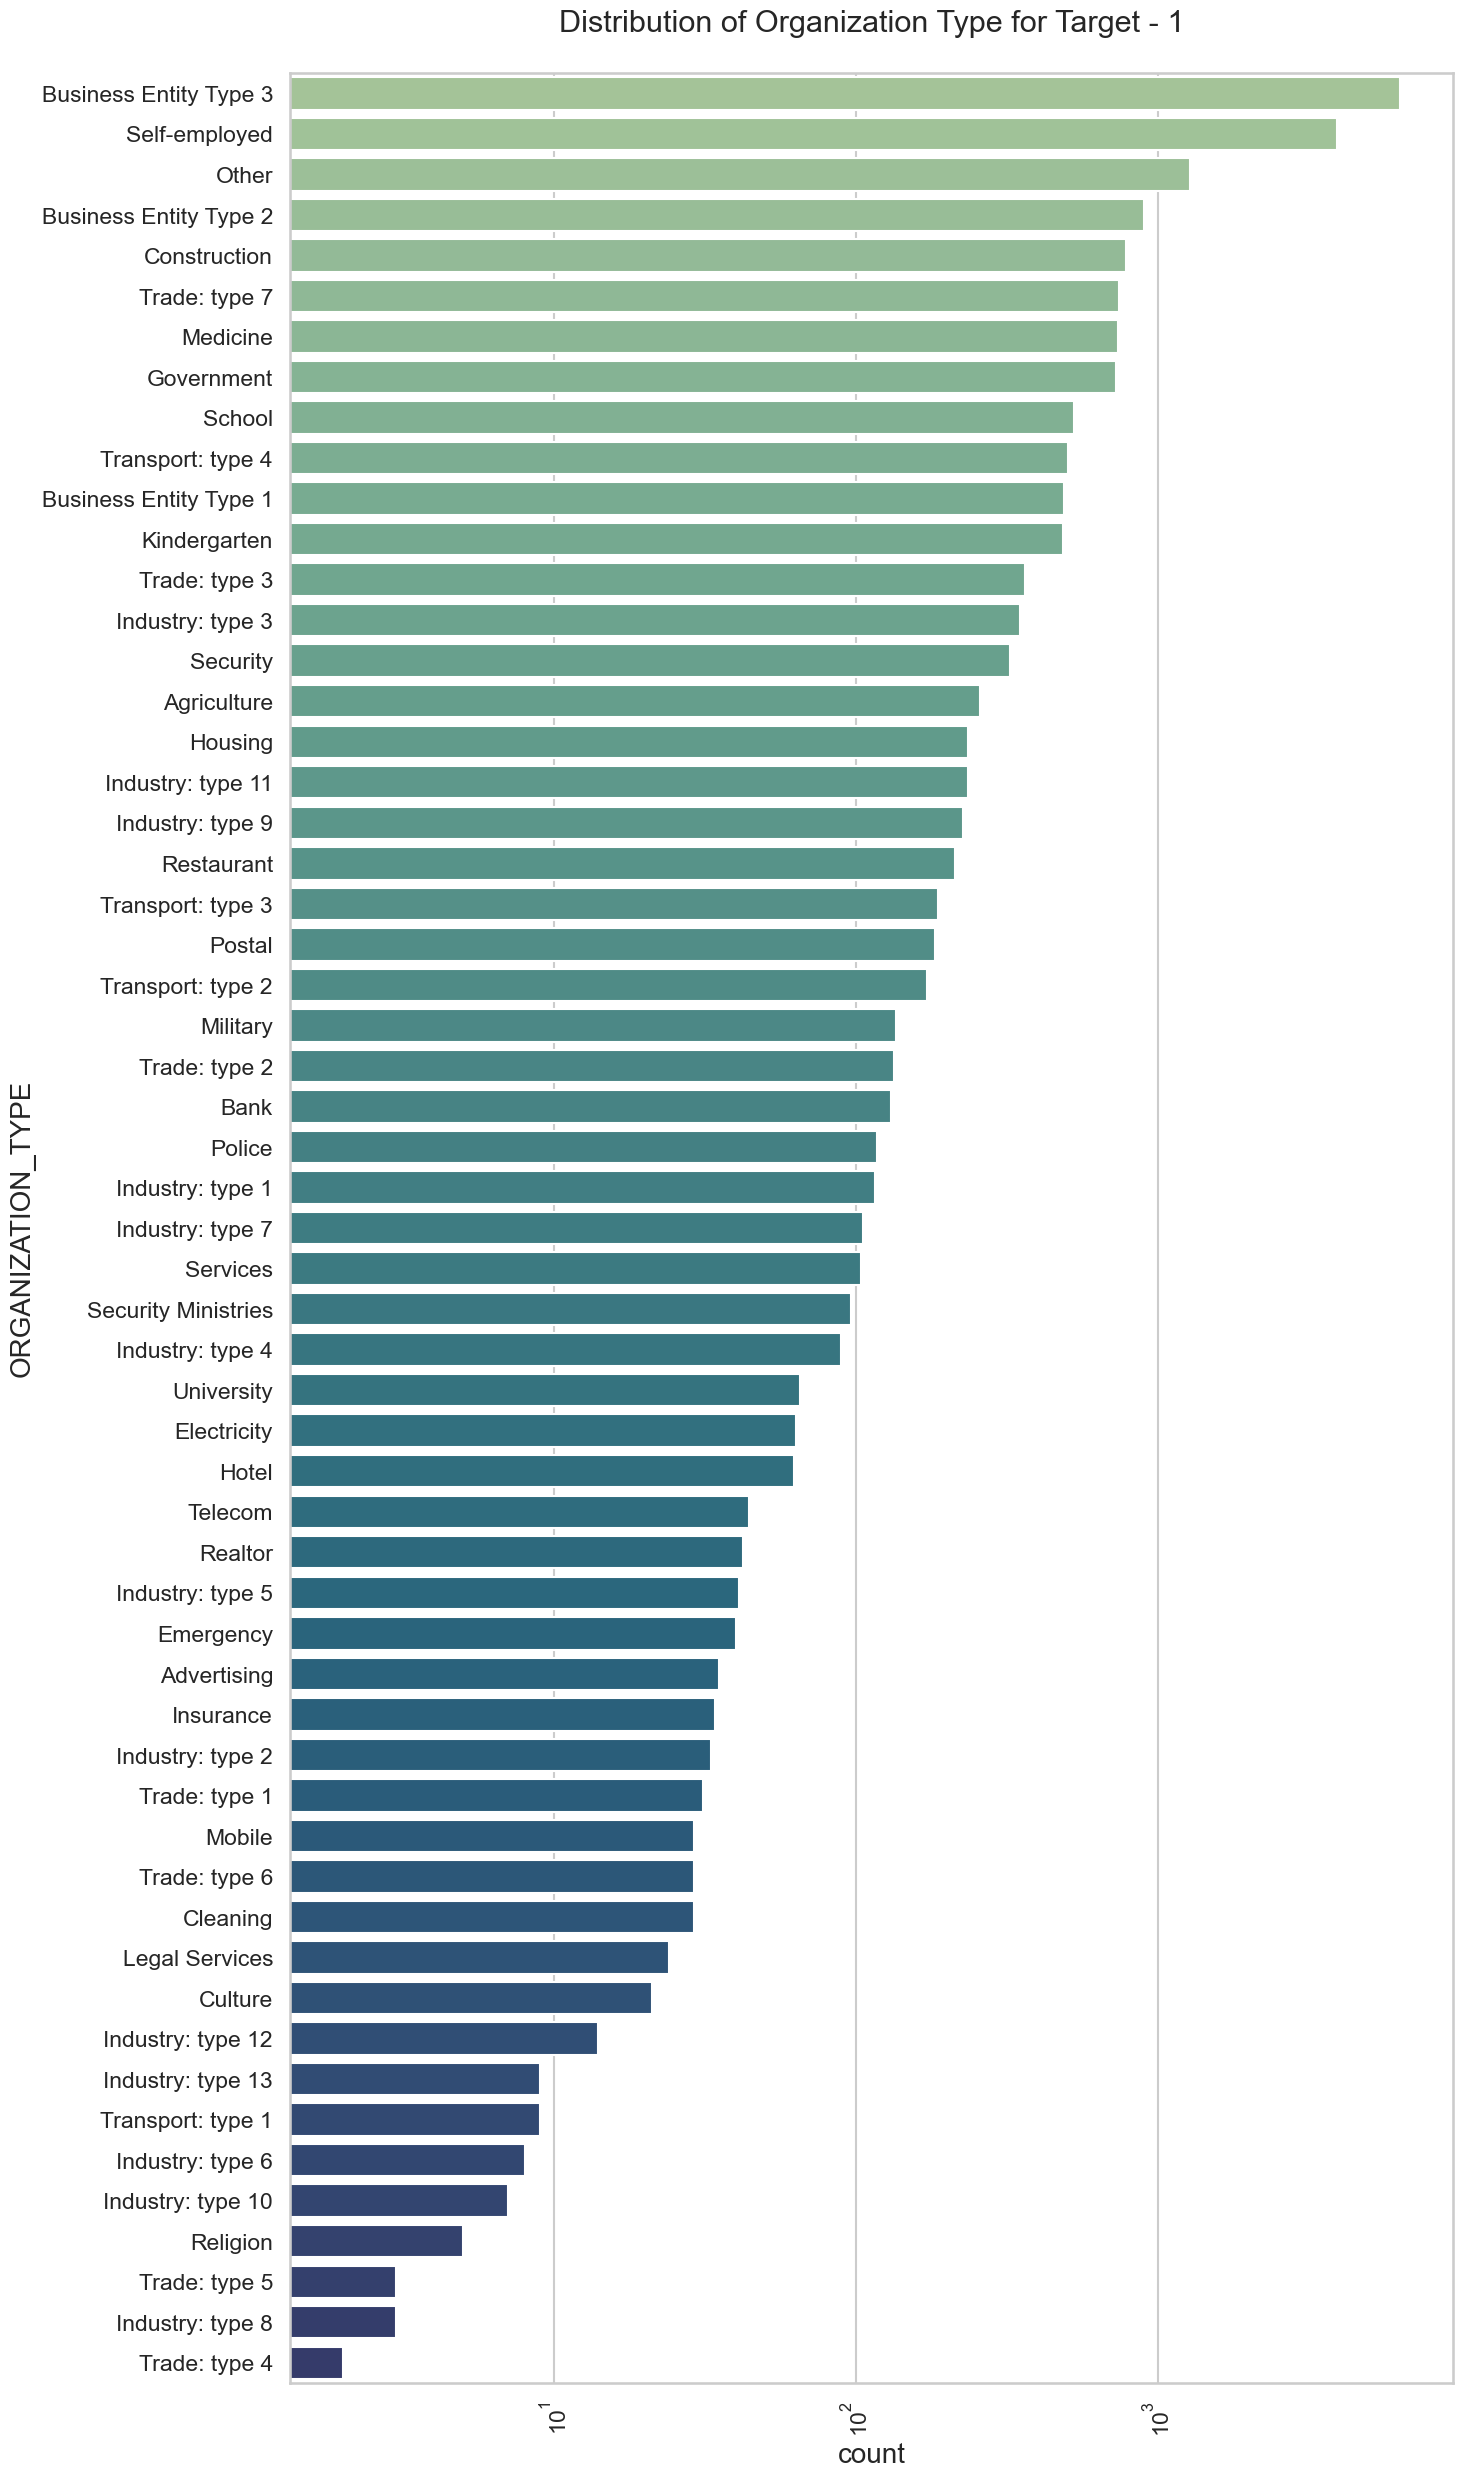

In [74]:
# Plotting for Organization type

# Set Seaborn styles and plot settings
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15, 30))  # Create a figure with a specified size

# Set label, title, and title padding settings
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Set the title
plt.title("Distribution of Organization Type for Target - 1")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Use a logarithmic scale for the x-axis
plt.xscale('log')

# Create a countplot with specified data, column, order, and color palette
sns.countplot(data=target1, y='ORGANIZATION_TYPE', order=target1['ORGANIZATION_TYPE'].value_counts().index, palette='crest')

# Show the plot
plt.show()

Here are the key findings from the above graph:

1. Clients who have applied for credits come from various organization types, including 'Business entity Type 3,' 'Self-employed,' 'Other,' 'Medicine,' and 'Government.'
2. Conversely, there are fewer clients from organization types such as 'Industry type 8,' 'type 6,' 'type 10,' 'religion and trade type 5,' and 'type 4.'
3. The distribution of organization type for type 0 is similar to the mentioned pattern.

## Univariant Analysis of Numerical Variables

In [75]:
# Creating defenition of Box plot for Numerical Variables on Logarithmic Scale
def univariate_numerical(data, col, title):
    # Set Seaborn styles and plot settings
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    # Set the title
    plt.title(title)
    
    # Use a logarithmic scale for the y-axis
    plt.yscale('log')
    
    # Create a boxplot with specified data, column, and orientation
    sns.boxplot(data=data, x=col, orient='v')
    
    # Show the plot
    plt.show()


#### Univariant Anlysis on Target 0 - with No Payment Dificulties

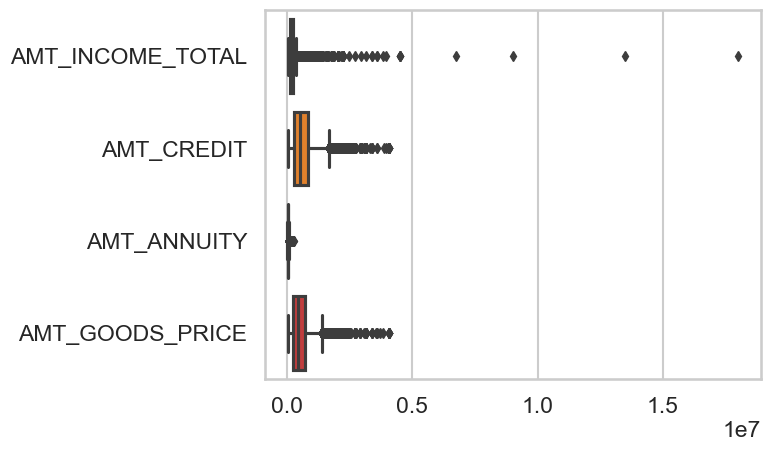

In [76]:
# Distribution of Numeric variables in Box plot

sns.boxplot(data=target0[["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]], orient = 'h')
plt.show()

Here are the key findings from the above graph:

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount and Amt Annuity
3. The first quartile is bigger than third quartile for credit amount and Goods Price which means most of the credits of clients are present in the first quartile.

Meaning of Variables:
1. AMT_INCOME_TOTAL -Income of the client
2. AMT_CREDIT - Credit amount of the loan
3. AMT_ANNUITY -	Loan annuity
4. AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given


#### Univariant Anlysis on Target 1 - with Payment Dificulties

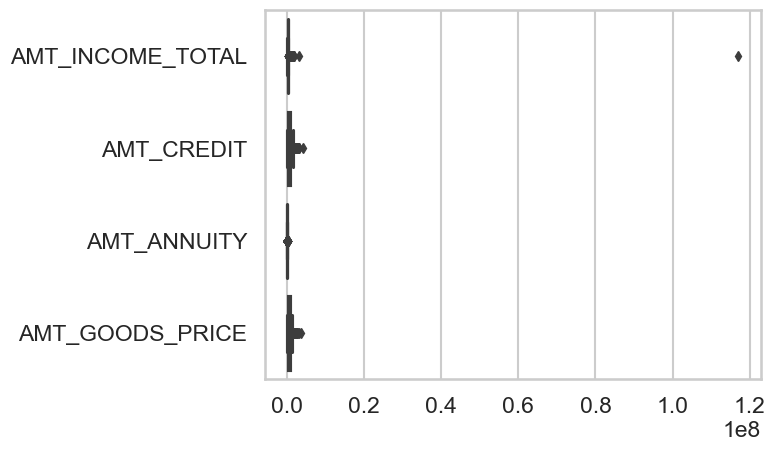

In [77]:
# Distribution of Numeric variables in Box plot

sns.boxplot(data=target1[["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]], orient = 'h')
plt.show()

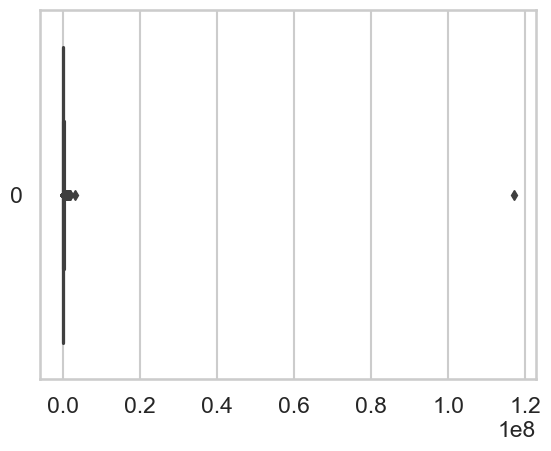

In [78]:
sns.boxplot(data=target1["AMT_INCOME_TOTAL"], orient = 'h')
plt.show()

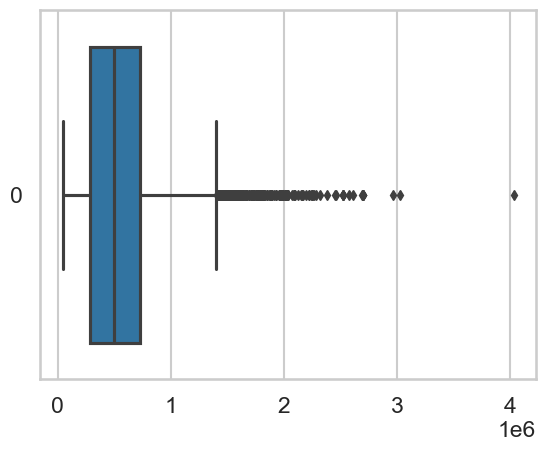

In [79]:
sns.boxplot(data=target1["AMT_CREDIT"], orient = 'h')
plt.show()

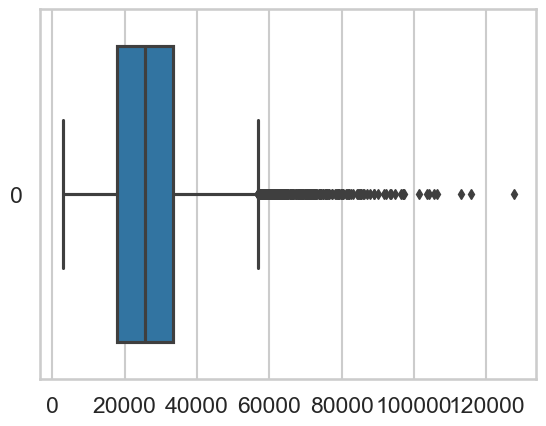

In [80]:
sns.boxplot(data=target1["AMT_ANNUITY"], orient = 'h')
plt.show()

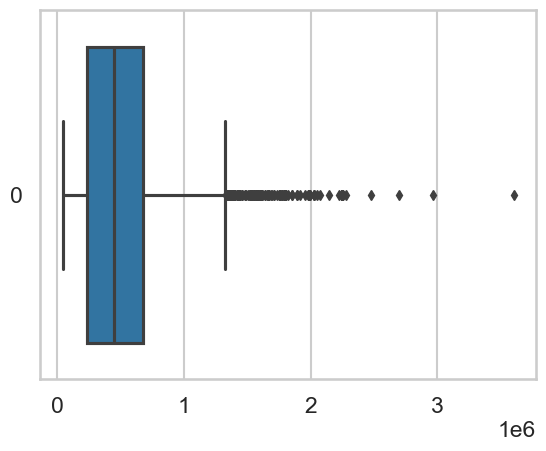

In [81]:
sns.boxplot(data=target1["AMT_GOODS_PRICE"], orient = 'h')
plt.show()

Few points can be concluded from the graph above.

1. Some outliers are noticed on all Numerical variables and for income amount there is one univariant outlier observed.
2. quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile for all Numeric Variables

#### Finding Correlation between Numerical Columns

In [82]:
# Finding Spearman correlation for numerical columns for both target 0 and 1 

target0_corr=target0.iloc[0:,2:]
target1_corr=target1.iloc[0:,2:]

target0_df=target0_corr.corr(method='spearman')
target1_df=target1_corr.corr(method='spearman')


In [83]:
target0_df

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
AMT_GOODS_PRICE                 -0.027084          0.408319    0.984499   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                      -0.266534          0.054666    0.169030   
DAYS_EMPLOYED                   -0.030948          0.060868    0.104251   
DAYS_REGISTRATION               -0.155518         -0.040559    0.015318   
DAYS_ID_PUBLISH                  0.119164          0.036702    0.038197   
FLAG_MOBIL                       0.001518          0.001334    0.001784   
FLAG_EMP_PHONE                   0.001905         -0.003887   -0.002788   
FLAG_WORK_PHONE                 -0.012116         -0.116929   -0.053181   
FLAG_CONT_MOBILE                 0.002632         -0.006908    0.032588   
FLAG_PHONE                      -0.034281         -0.001622    0.023786   
FLAG_EMAIL                       0.010351          0.087402    0.007630   
CNT_FAM_MEMBERS                  0.848232         -0.011545    0.045683   
REGION_RATING_CLIENT             0.035561         -0.216438   -0.091606   
REGION_RATING_CLIENT_W_CITY      0.034350         -0.238145   -0.100894   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   
EXT_SOURCE_2                    -0.027456          0.184161    0.137629   
EXT_SOURCE_3                    -0.016471         -0.068317    0.044201   
OBS_30_CNT_SOCIAL_CIRCLE         0.026816         -0.036970   -0.001623   
DEF_30_CNT_SOCIAL_CIRCLE         0.005460         -0.034036   -0.018819   
OBS_60_CNT_SOCIAL_CIRCLE         0.026536         -0.036669   -0.001530   
DEF_60_CNT_SOCIAL_CIRCLE         0.003688         -0.034723   -0.021286   
DAYS_LAST_PHONE_CHANGE           0.001645          0.052422    0.079351   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.010795        -0.027084   
AMT_INCOME_TOTAL                0.472204         0.408319   
AMT_CREDIT                      0.826689         0.984499   
AMT_ANNUITY                     1.000000         0.823739   
AMT_GOODS_PRICE                 0.823739         1.000000   
REGION_POPULATION_RELATIVE      0.064328         0.069873   
DAYS_BIRTH                      0.100287         0.169015   
DAYS_EMPLOYED                   0.074643         0.109297   
DAYS_REGISTRATION              -0.010712         0.014990   
DAYS_ID_PUBLISH                 0.027354         0.039771   
FLAG_MOBIL                     -0.000007         0.001724   
FLAG_EMP_PHONE                 -0.002229        -0.002758   
FLAG_WORK_PHONE                -0.062149        -0.033027   
FLAG_CONT_MOBILE                0.031607         0.029286   
FLAG_PHONE                      0.010034         0.038951   
FLAG_EMAIL                      0.057745         0.007336   
CNT_FAM_MEMBERS                 0.052970         0.045293   
REGION_RATING_CLIENT           -0.119092        -0.094005   
REGION_RATING_CLIENT_W_CITY    -0.133170        -0.102808   
HOUR_APPR_PROCESS_START         0.032953         0.044984   
REG_REGION_NOT_LIVE_REGION      0.033435         0.016810   
REG_REGION_NOT_WORK_REGION      0.070841         0.043014   
LIVE_REGION_NOT_WORK_REGION     0.069051         0.045765   
REG_CITY_NOT_L

In [84]:
target1_df

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
AMT_GOODS_PRICE                 -0.005792          0.369080    0.975458   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                      -0.175025          0.103026    0.200718   
DAYS_EMPLOYED                   -0.006823          0.053798    0.107605   
DAYS_REGISTRATION               -0.110854         -0.011378    0.021973   
DAYS_ID_PUBLISH                  0.091042          0.051113    0.065143   
FLAG_MOBIL                            NaN               NaN         NaN   
FLAG_EMP_PHONE                   0.005055         -0.006178   -0.009650   
FLAG_WORK_PHONE                 -0.000583         -0.135888   -0.081660   
FLAG_CONT_MOBILE                 0.006947          0.001611    0.040356   
FLAG_PHONE                      -0.029409         -0.018122   -0.009178   
FLAG_EMAIL                       0.010805          0.094630    0.013229   
CNT_FAM_MEMBERS                  0.845289         -0.029655    0.060267   
REGION_RATING_CLIENT             0.048236         -0.163605   -0.050664   
REGION_RATING_CLIENT_W_CITY      0.049688         -0.181015   -0.063304   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   
EXT_SOURCE_2                    -0.014702          0.151537    0.120180   
EXT_SOURCE_3                     0.000361         -0.048537    0.083735   
OBS_30_CNT_SOCIAL_CIRCLE         0.034901         -0.006082    0.016914   
DEF_30_CNT_SOCIAL_CIRCLE        -0.001687         -0.026784   -0.028261   
OBS_60_CNT_SOCIAL_CIRCLE         0.034091         -0.006269    0.016878   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003596         -0.028520   -0.033856   
DAYS_LAST_PHONE_CHANGE          -0.015176          0.076684    0.106939   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015133        -0.005792   
AMT_INCOME_TOTAL                0.428947         0.369080   
AMT_CREDIT                      0.812093         0.975458   
AMT_ANNUITY                     1.000000         0.805644   
AMT_GOODS_PRICE                 0.805644         1.000000   
REGION_POPULATION_RELATIVE      0.028666         0.058364   
DAYS_BIRTH                      0.100200         0.198796   
DAYS_EMPLOYED                   0.060193         0.116043   
DAYS_REGISTRATION              -0.019762         0.023023   
DAYS_ID_PUBLISH                 0.044128         0.069184   
FLAG_MOBIL                           NaN              NaN   
FLAG_EMP_PHONE                 -0.006327        -0.009240   
FLAG_WORK_PHONE                -0.075362        -0.052397   
FLAG_CONT_MOBILE                0.040549         0.037334   
FLAG_PHONE                     -0.021928         0.010852   
FLAG_EMAIL                      0.065316         0.015598   
CNT_FAM_MEMBERS                 0.062994         0.058337   
REGION_RATING_CLIENT           -0.059905        -0.060755   
REGION_RATING_CLIENT_W_CITY    -0.076330        -0.072660   
HOUR_APPR_PROCESS_START         0.021129         0.037319   
REG_REGION_NOT_LIVE_REGION      0.029646         0.018455   
REG_REGION_NOT_WORK_REGION      0.060363         0.036891   
LIVE_REGION_NOT_WORK_REGION     0.059724         0.038092   
REG_CITY_NOT_L

In [85]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="crest",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

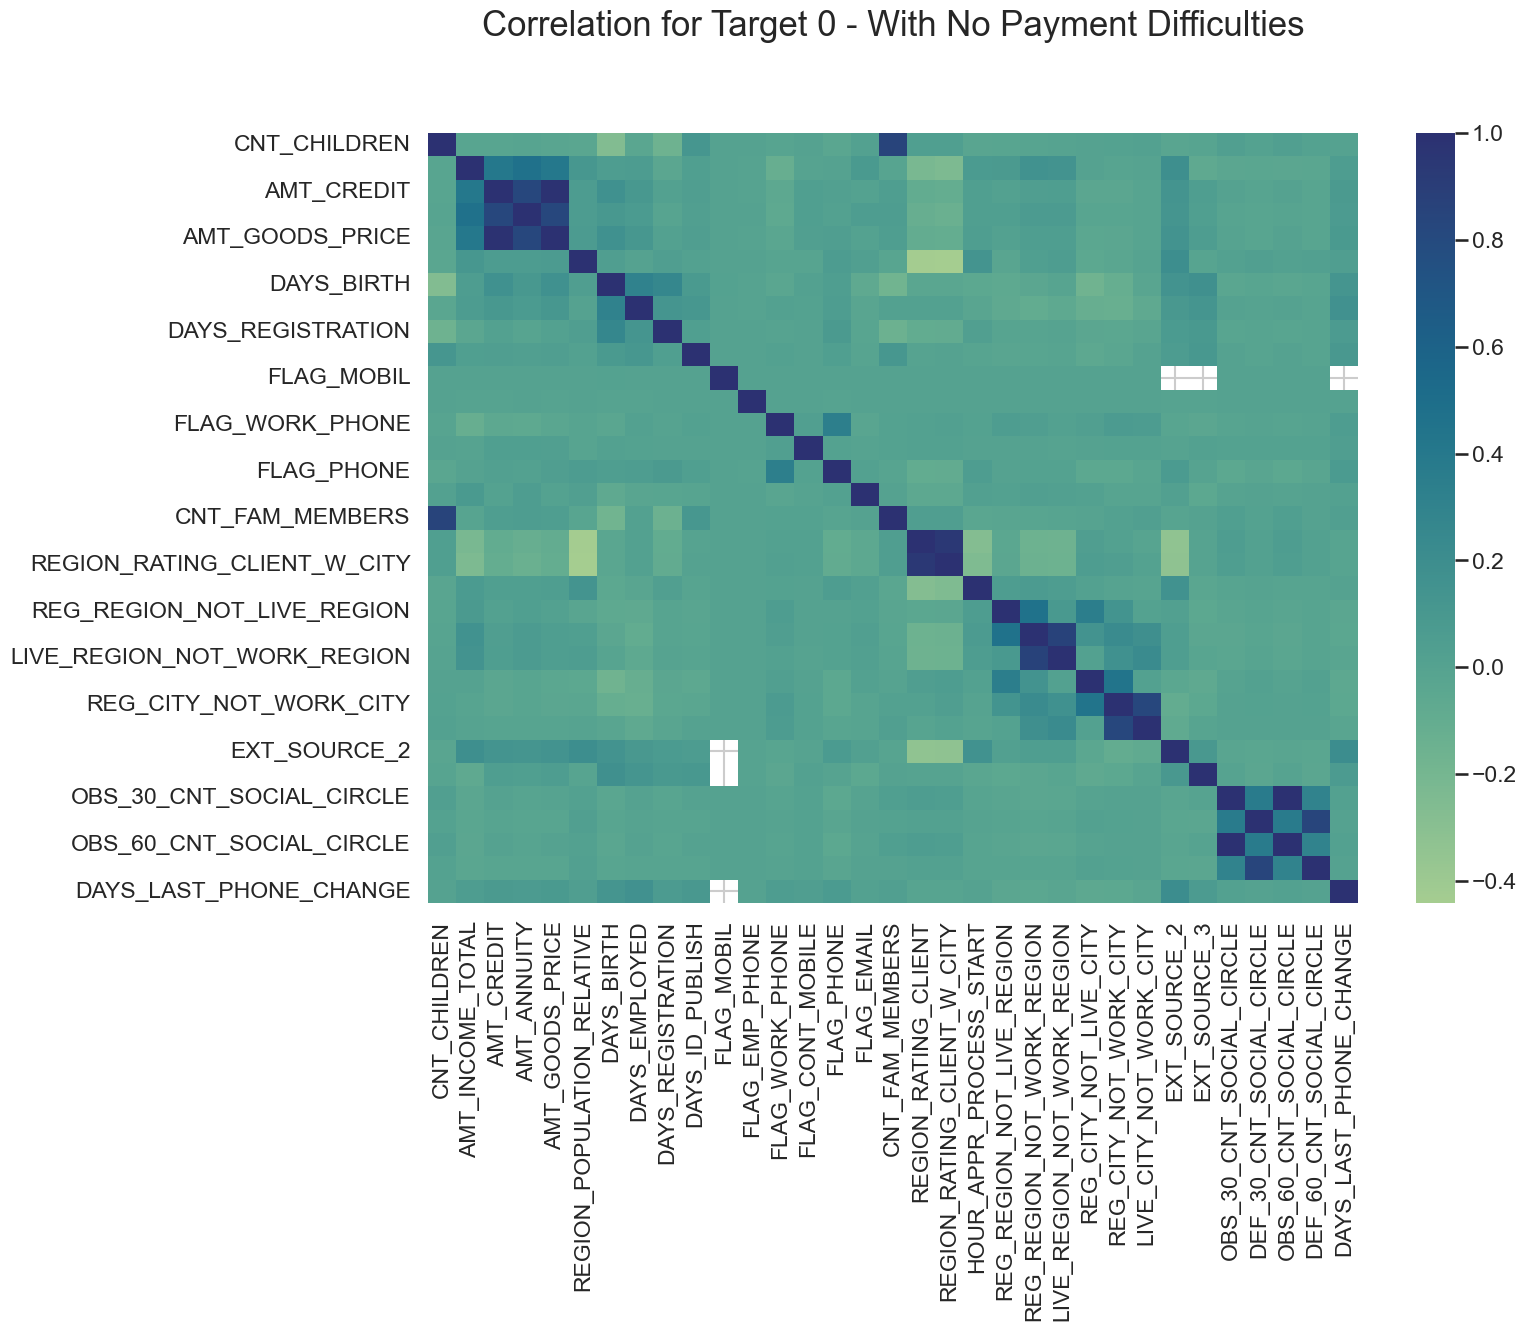

In [86]:
# Heat Map For Target 0 - No Payment Difficulties

targets_corr(data=target0_df,title='Correlation for Target 0 - With No Payment Difficulties')

Based on the correlation heatmap observations you provided, here is a summary of the key points:

1. Credit amount is inversely proportional to the date of birth, indicating that younger clients tend to have higher credit amounts, while older clients have lower credit amounts.

2. Credit amount is inversely proportional to the number of children clients have. Clients with fewer children tend to have higher credit amounts, whereas those with more children have lower credit amounts.

3. Income amount is inversely proportional to the number of children clients have. Clients with fewer children tend to have higher incomes, while those with more children have lower incomes.

4. There is a trend of clients with fewer children residing in densely populated areas.

5. Credit amount tends to be higher for clients residing in densely populated areas.

6. Income levels are also higher for clients living in densely populated areas.

These observations highlight various relationships between credit amount, age, number of children, income, and population density within the dataset.

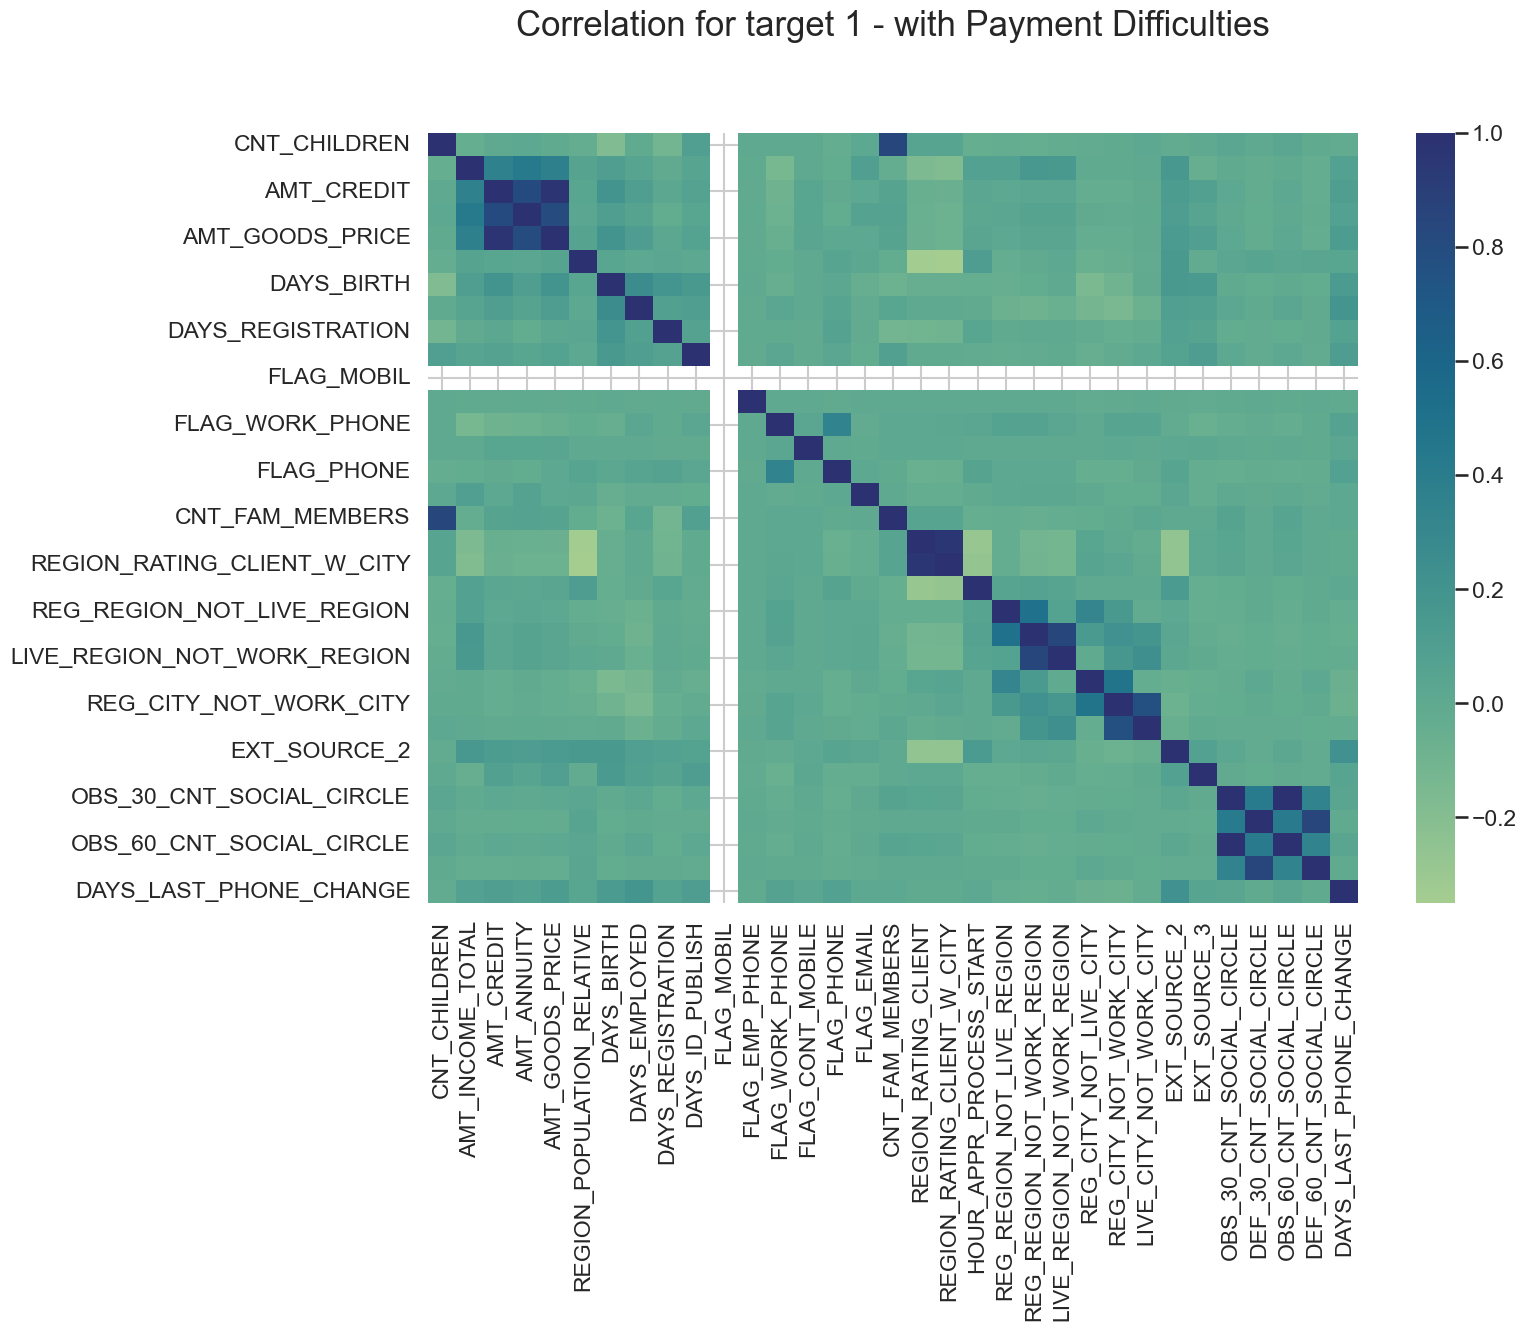

In [87]:
# Heat Map with Target 1 - With Payment Dificulties

targets_corr(data=target1_df,title='Correlation for target 1 - with Payment Difficulties')


The heat map for Target 1 shares several similarities with the observations for Target 0, indicating similar trends in certain aspects. However, there are also some distinct differences noted for Target 1:

1. Clients whose permanent address does not match their contact address tend to have fewer children, and vice versa.

2. Similarly, clients whose permanent address does not match their work address also tend to have fewer children, and vice versa.

These differences suggest that there may be specific factors or patterns associated with Target 1 that differ from those observed for Target 0 in the dataset.

## Bivariant Analysis of Numerical Variables

#### With No payment difficulties (Target 0)

In [88]:
# Creating Custom Function of ploting

def bi_num(data, x,y, hue, orient='v'):
    # Create a figure with a specified size
    plt.figure(figsize=(16, 12))

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    plt.yscale('log')

    # Create a boxplot with specified data, columns, hue, and orientation
    sns.boxplot(data=data, x=x, y=y, hue=hue, orient='v')

    # Show the plot
    plt.show()

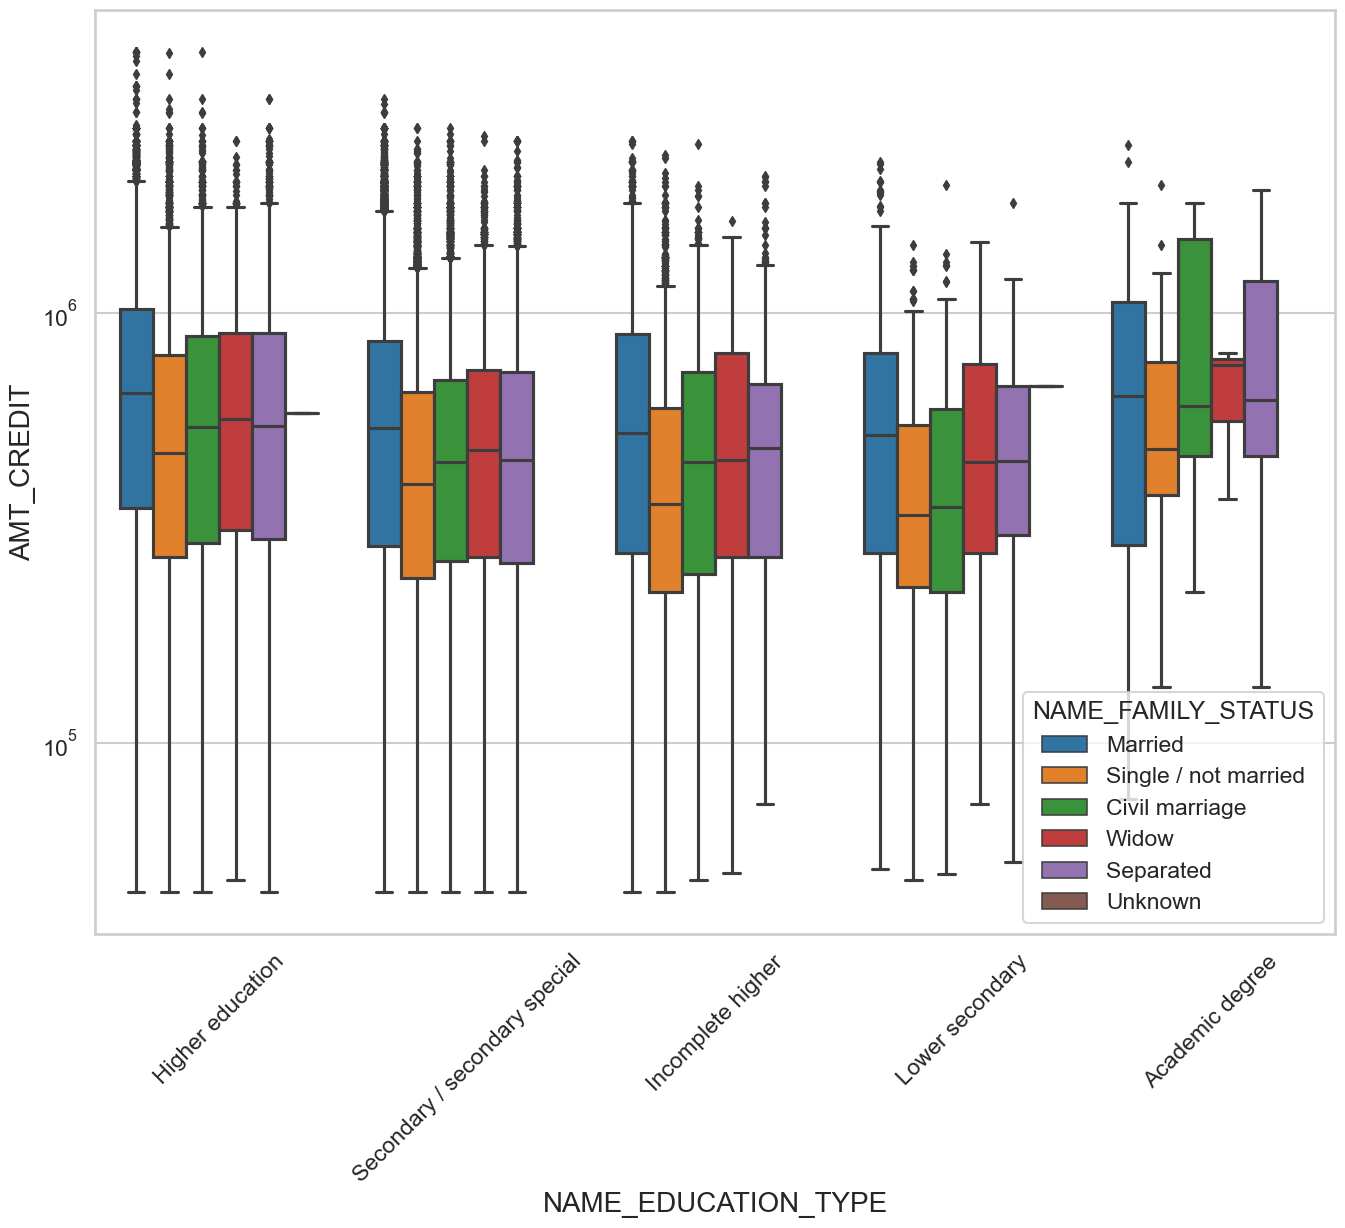

In [89]:
# Box plotting for Credit amount in logarithmic scale

# Create a boxplot with specified data, columns, hue, and orientation
bi_num(data=target0, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v')


Based on the information provided in the box plot analysis, we can draw the following conclusions:

1. Family status categories such as 'civil marriage,' 'marriage,' and 'separated' tend to have a higher number of credits compared to other family status categories within the Academic degree education group.

2. Among the higher education levels, specifically for family status categories 'marriage,' 'single,' and 'civil marriage,' there are more outliers. This suggests that there may be some unique or extreme cases within these categories in terms of the number of credits.

3. In the case of 'civil marriage' within the Academic degree education group, most of the credits fall within the third quartile, indicating that this family status category has a substantial number of credits in the upper range of values.

These conclusions provide insights into the relationships between family status, education level, and the number of credits, as well as the presence of outliers and quartile distribution within the dataset.


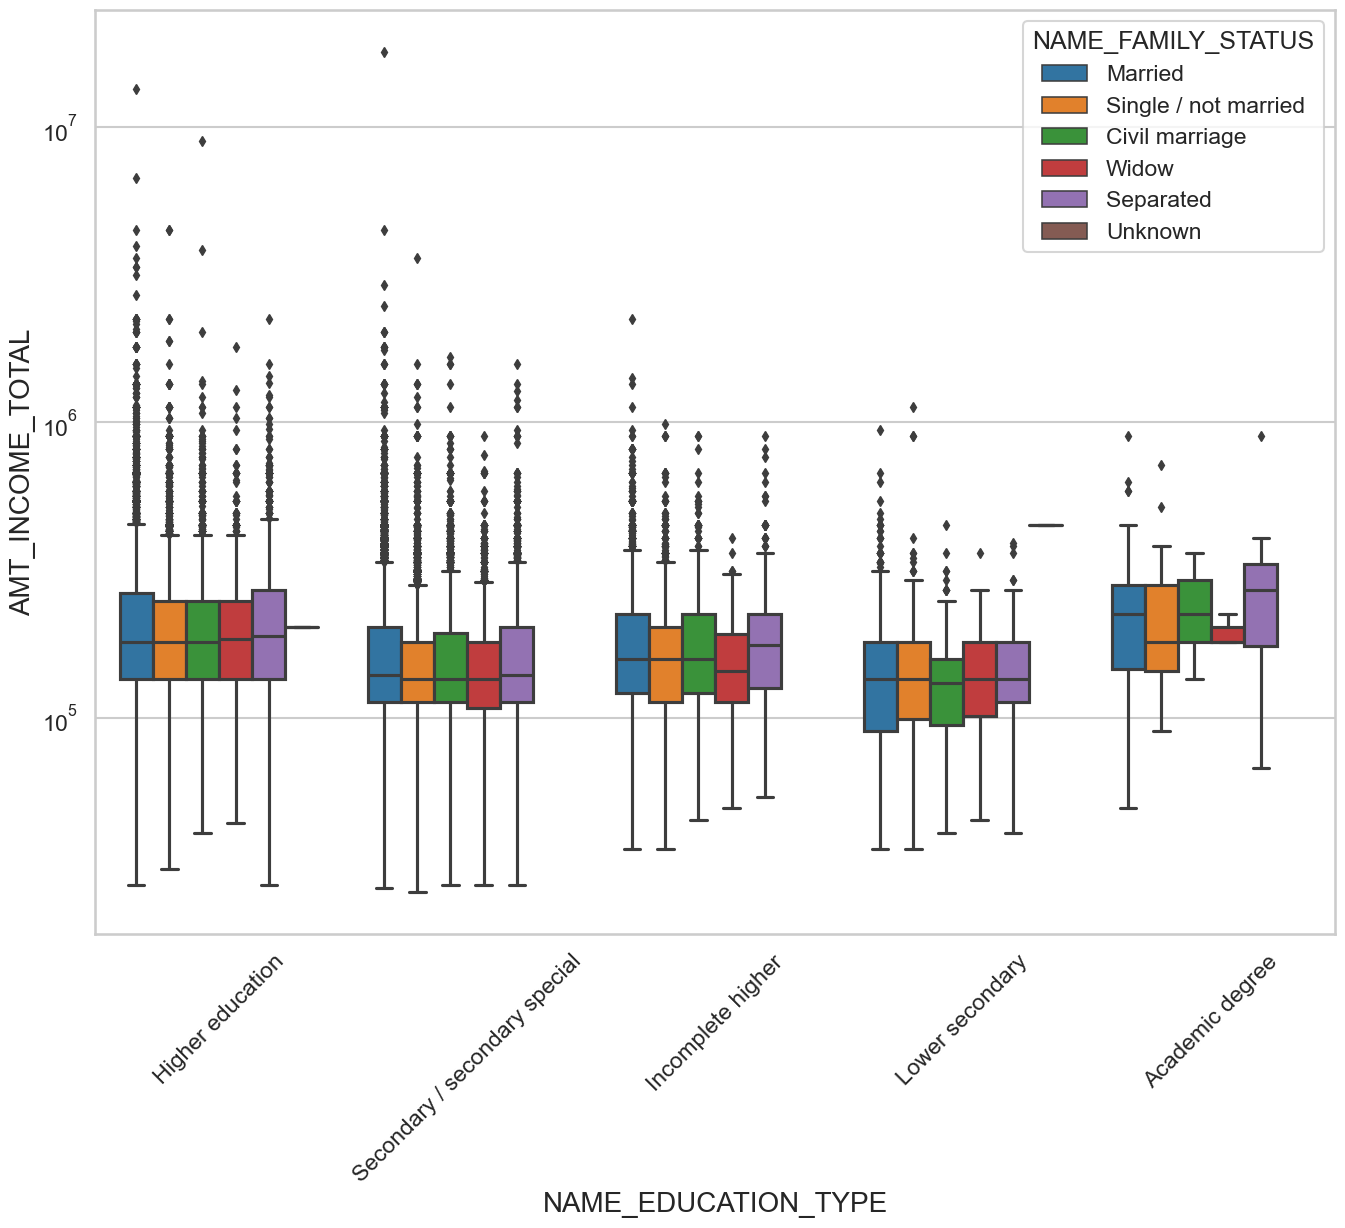

In [90]:
# Box plotting for Income amount in logarithmic scale

# Create a boxplot with specified data, columns, hue, and orientation
# Use a logarithmic scale for the y-axis

bi_num(data=target0, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v')

Based on the information provided from the boxplot analysis, we can make the following observations:

1. For the education type 'Higher education,' the income amount tends to be fairly consistent across different family status categories. This suggests that individuals with 'Higher education' generally have similar income levels, regardless of their family status.

2. The 'Higher education' group contains many outliers, indicating that there are some individuals with significantly higher or lower incomes within this category.

3. In contrast, for the 'Academic degree' education type, there are fewer outliers, and the income amount tends to be slightly higher compared to 'Higher education.' This suggests that individuals with 'Academic degree' education may have slightly higher incomes on average.

4. Within the 'Civil marriage' family status category and the 'Lower secondary' education type, there is a lower income amount compared to other combinations of family status and education types. This indicates that individuals with 'Lower secondary' education and 'Civil marriage' family status tend to have lower incomes.

These observations provide insights into the relationships between education type, family status, and income levels, as well as the presence of outliers within the dataset.

#### With payment difficulties (Target 1)

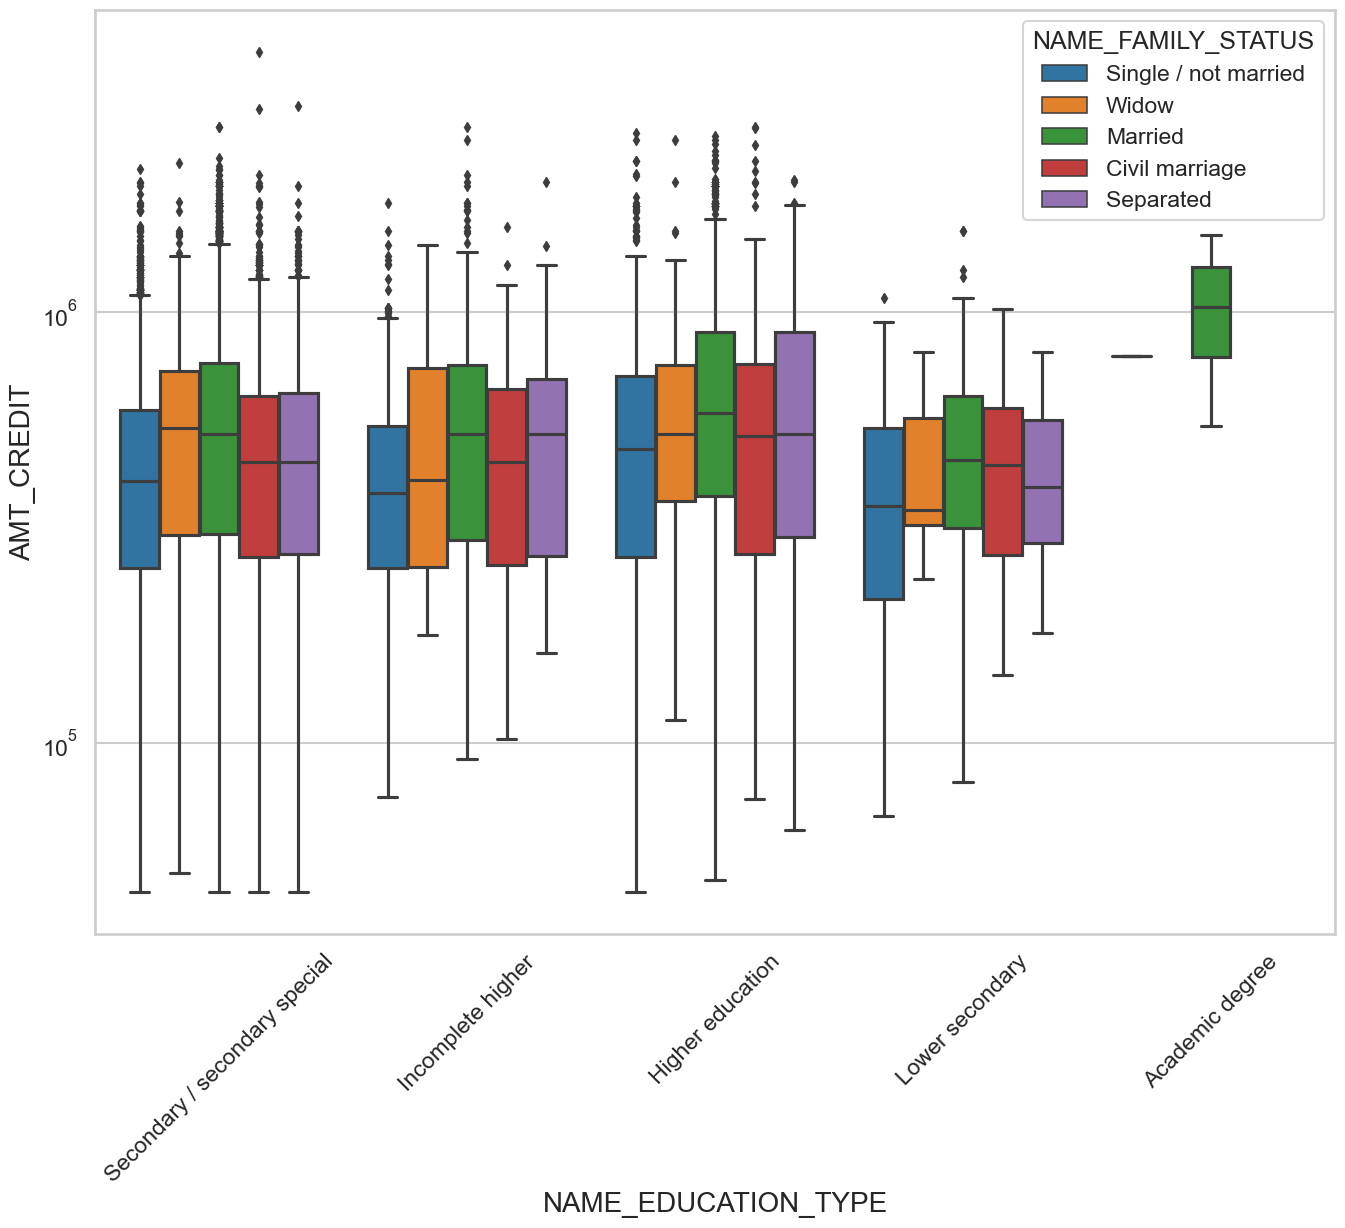

In [91]:
# Box plotting for credit amount

# Create a boxplot with specified data, columns, hue, and orientation
bi_num(data=target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', orient='v')


Based on the information provided in the box plot analysis, we can draw the following conclusions:

1. Family status categories such as 'civil marriage,' 'marriage,' and 'separated' tend to have a higher number of credits compared to other family status categories within the Higher education group.

2. Among the higher education levels, specifically for family status categories 'marriage,' 'single,' and 'civil marriage,' there are more outliers. This suggests that there may be some unique or extreme cases within these categories in terms of the number of credits.

3. For Academic degree Education group, Single status has very narrow Quatelies and Maried has higher number of credits compared to others.

These conclusions provide insights into the relationships between family status, education level, and the number of credits, as well as the presence of outliers and quartile distribution within the dataset.

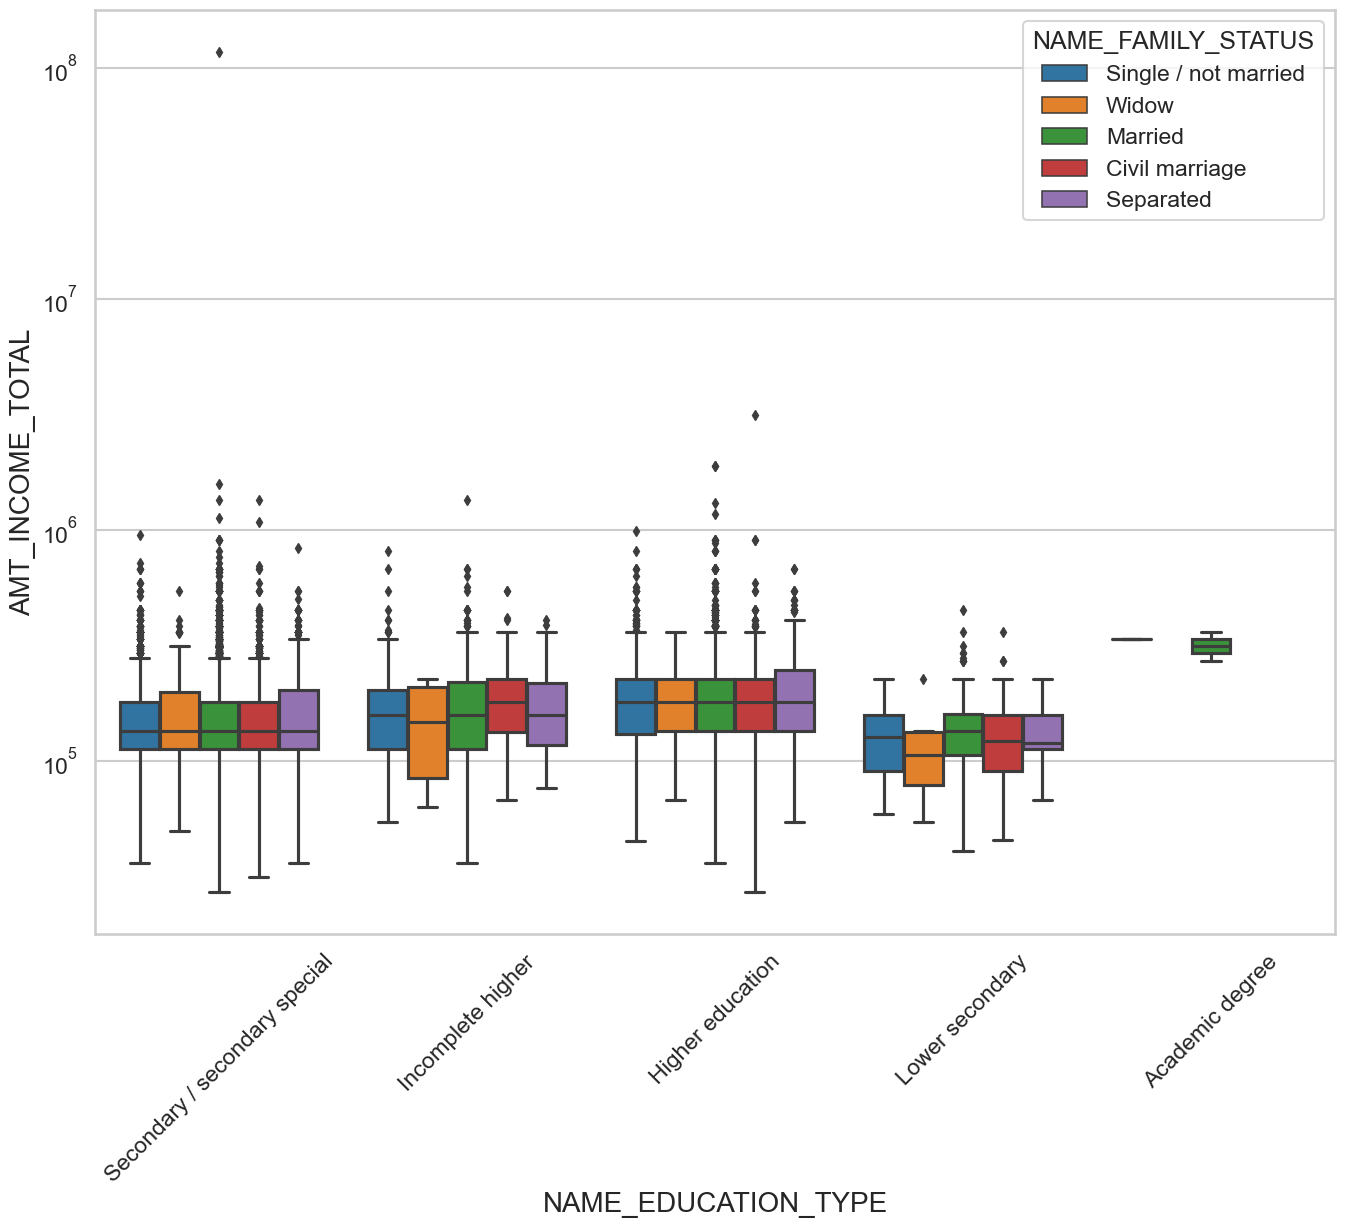

In [92]:
# Box plotting for Income amount in logarithmic scale

# Create a boxplot with specified data, columns, hue, and orientation
bi_num(data=target1, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='NAME_FAMILY_STATUS', orient='v')

Based on the information provided from the boxplot analysis, we can make the following observations:

1. For the education type 'Higher education,' the income amount tends to be fairly consistent across different family status categories. This suggests that individuals with 'Higher education' generally have similar income levels, regardless of their family status.

2. The 'Higher education' group contains many outliers, indicating that there are some individuals with significantly higher or lower incomes within this category.

3. In contrast, for the 'Academic degree' education type, there are no outliers, and the income amount tends to be slightly higher compared to 'Higher education.' This suggests that individuals with 'Academic degree' education may have slightly higher incomes on average.

4. Within the 'Civil marriage' family status category and the 'Lower secondary' education type, there is a lower income amount compared to other combinations of family status and education types. This indicates that individuals with 'Lower secondary' education and 'Civil marriage' family status tend to have lower incomes.

These observations provide insights into the relationships between education type, family status, and income levels, as well as the presence of outliers within the dataset.

## Analysing Previous Application Data

In [93]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [94]:
# Cleaning the missing data

pre_app.isnull().sum()


SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [95]:
# Display Percentage of Missing values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
100*pre_app.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [96]:
pre_app.shape

(1670214, 37)

In [97]:
##Clean the data with more than 40% missing values

missing_values=100*pre_app.isnull().mean()
pre_app.drop(missing_values[missing_values>40].keys(), axis=1, inplace=True)


In [98]:
pre_app.shape

(1670214, 26)

In [99]:
# Removing the column values of 'XNA' and 'XAP'

pre_app=pre_app.drop(pre_app[pre_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_app=pre_app.drop(pre_app[pre_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_app=pre_app.drop(pre_app[pre_app['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

pre_app.shape

(69635, 26)

In [100]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=app_data,right=pre_app,how='inner',on='SK_ID_CURR',suffixes='_x')

In [102]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [103]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [104]:
new_df1.shape

(51420, 61)

#### Univariant Analysis

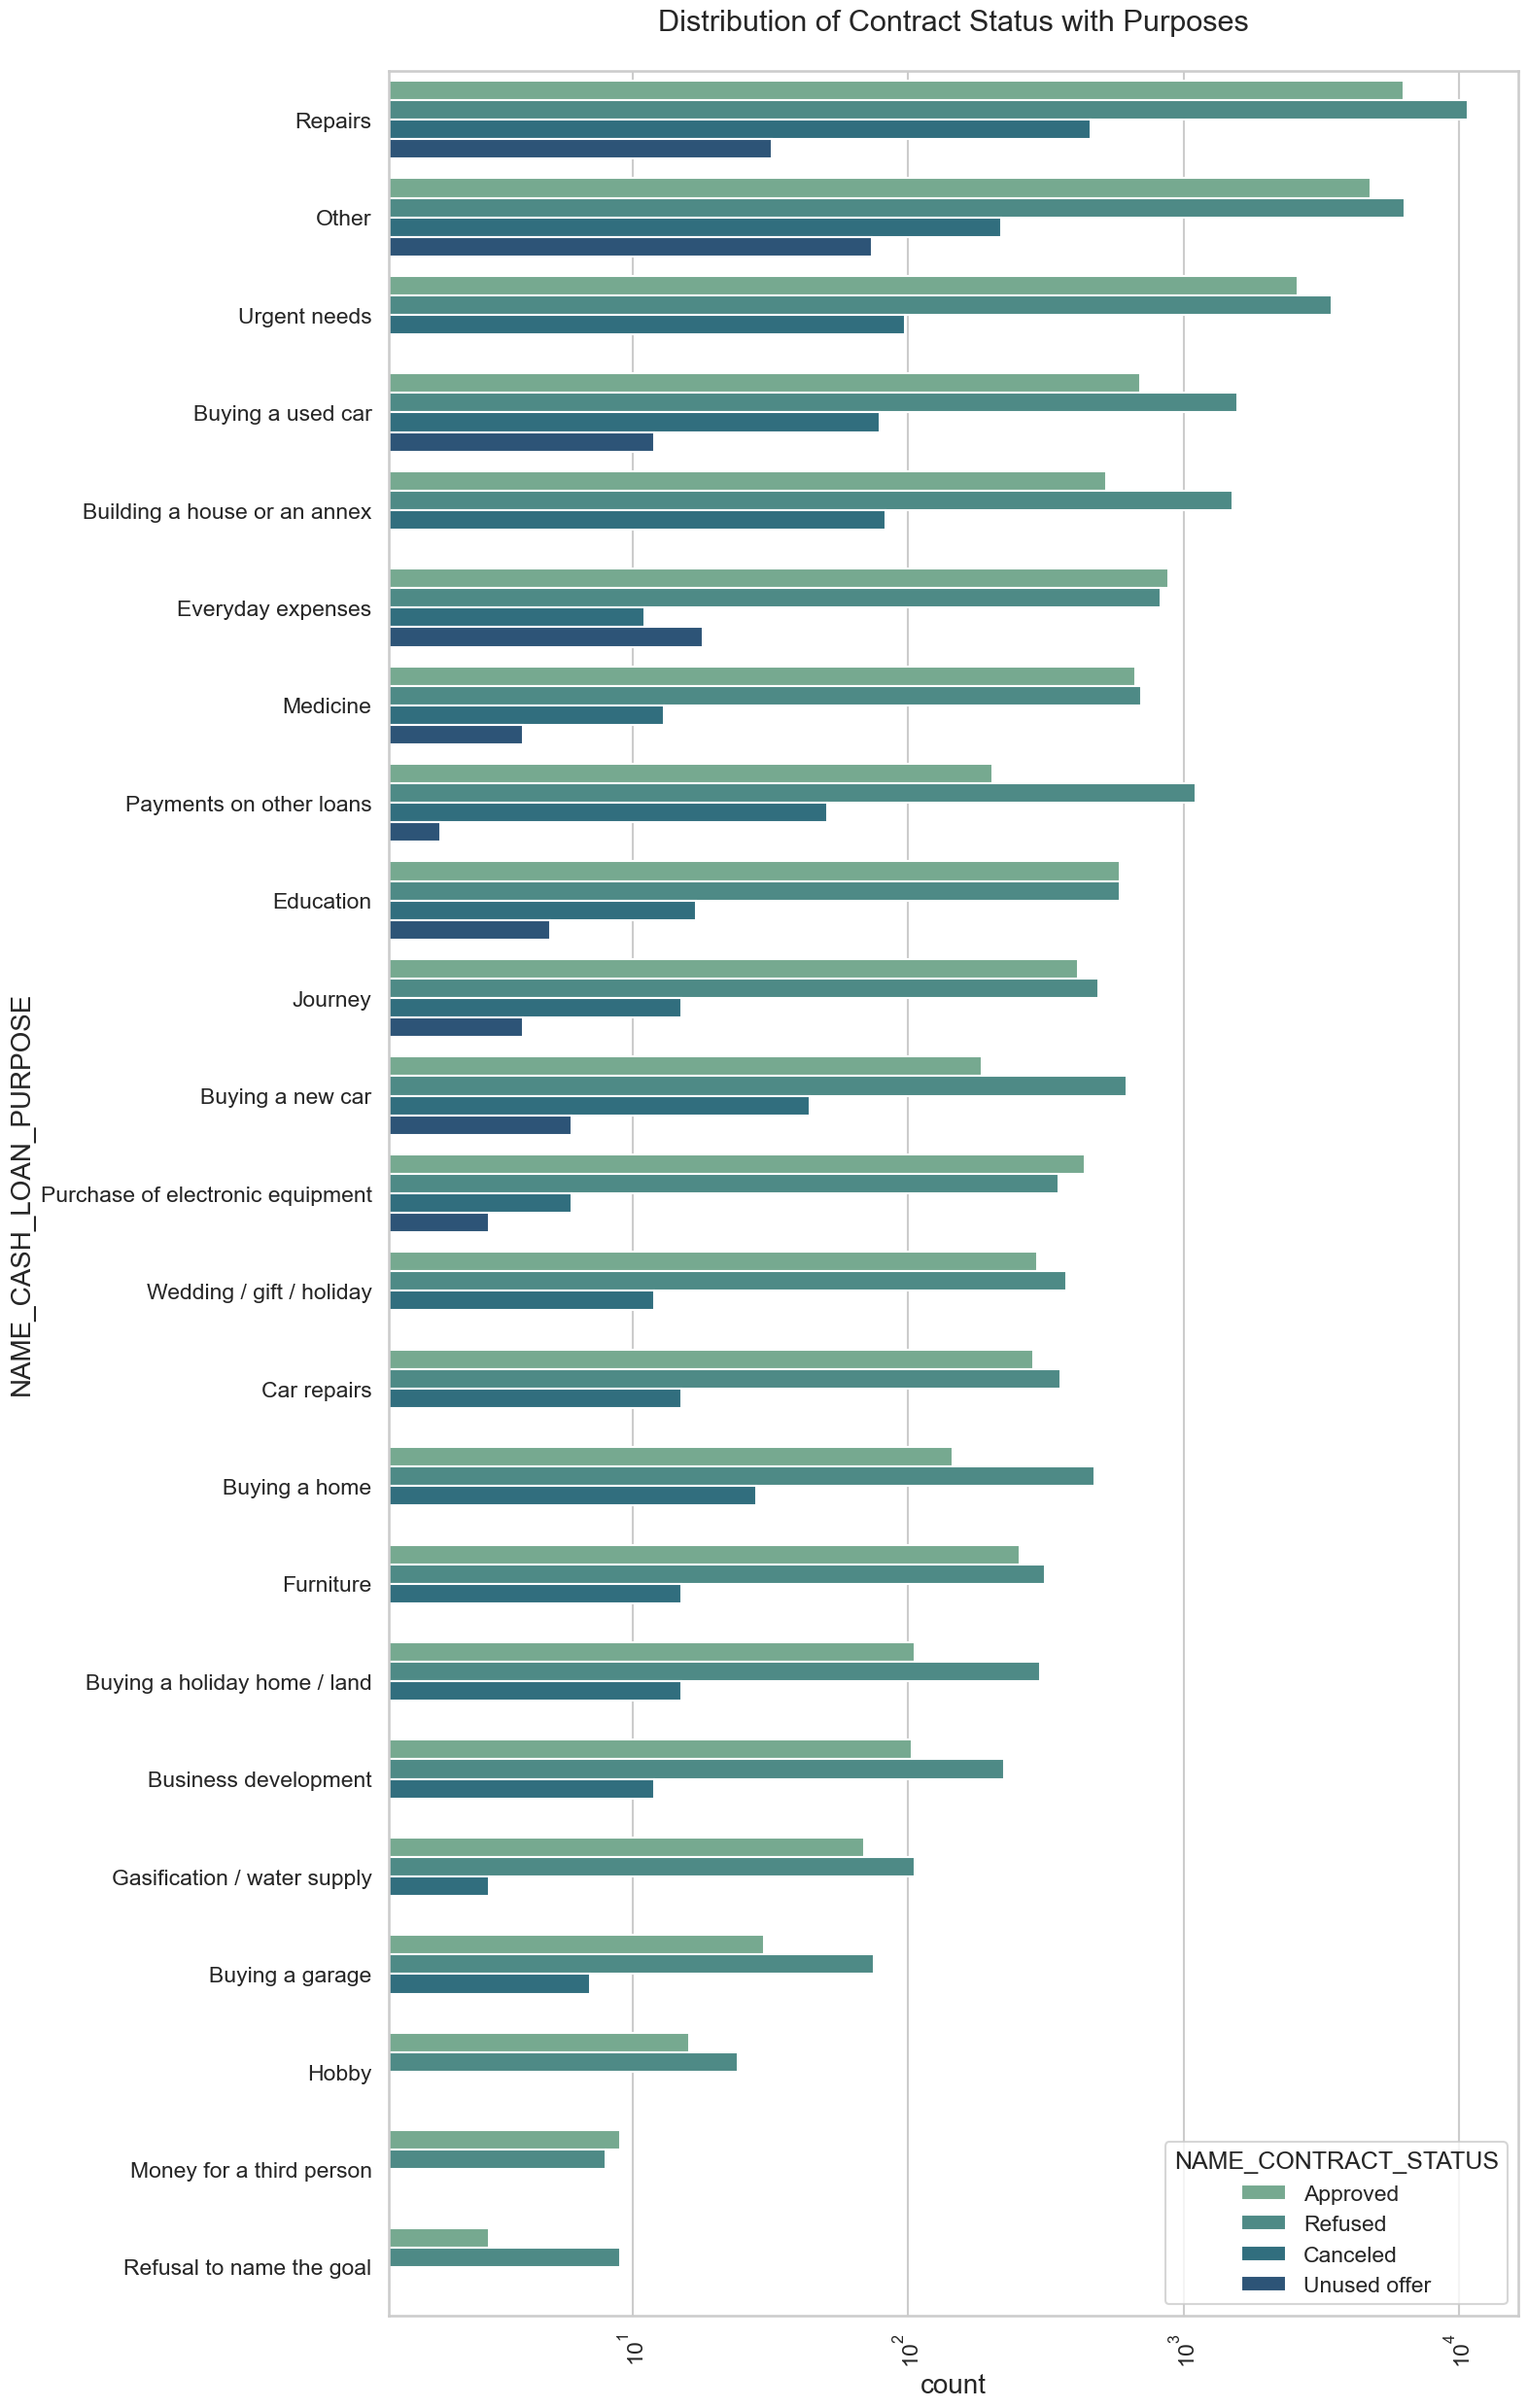

In [105]:
# Distribution of contract status in logarithmic scale

# Set Seaborn styles and plot settings
sns.set_style('whitegrid')
sns.set_context('talk')

# Create a figure with a specified size
plt.figure(figsize=(15, 30))

# Set label, title, and title padding settings
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Use a logarithmic scale for the x-axis
plt.xscale('log')

# Set the title
plt.title('Distribution of Contract Status with Purposes')

# Create a countplot with specified data, columns, order, hue, and color palette
ax = sns.countplot(data=new_df1, y='NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index, 
                   hue='NAME_CONTRACT_STATUS', palette='crest')

Here are the key conclusions drawn from the above plot:

1. The most rejected loan applications came from the purpose of 'repairs.' This suggests that loan applications for repair-related expenses are more likely to be rejected compared to other purposes.

2. For loan applications related to education purposes, the number of approvals and rejections is approximately equal. This indicates that loan applications for education purposes have a relatively balanced approval rate.

3. Loan applications for the purpose of 'paying other loans' and 'buying a new car' have a significantly higher rate of rejection compared to approvals. This implies that applicants seeking loans for these purposes are more likely to face rejection than approval.

4. These conclusions provide insights into the loan approval and rejection patterns based on the specified purposes, helping to identify trends and potential areas of concern.

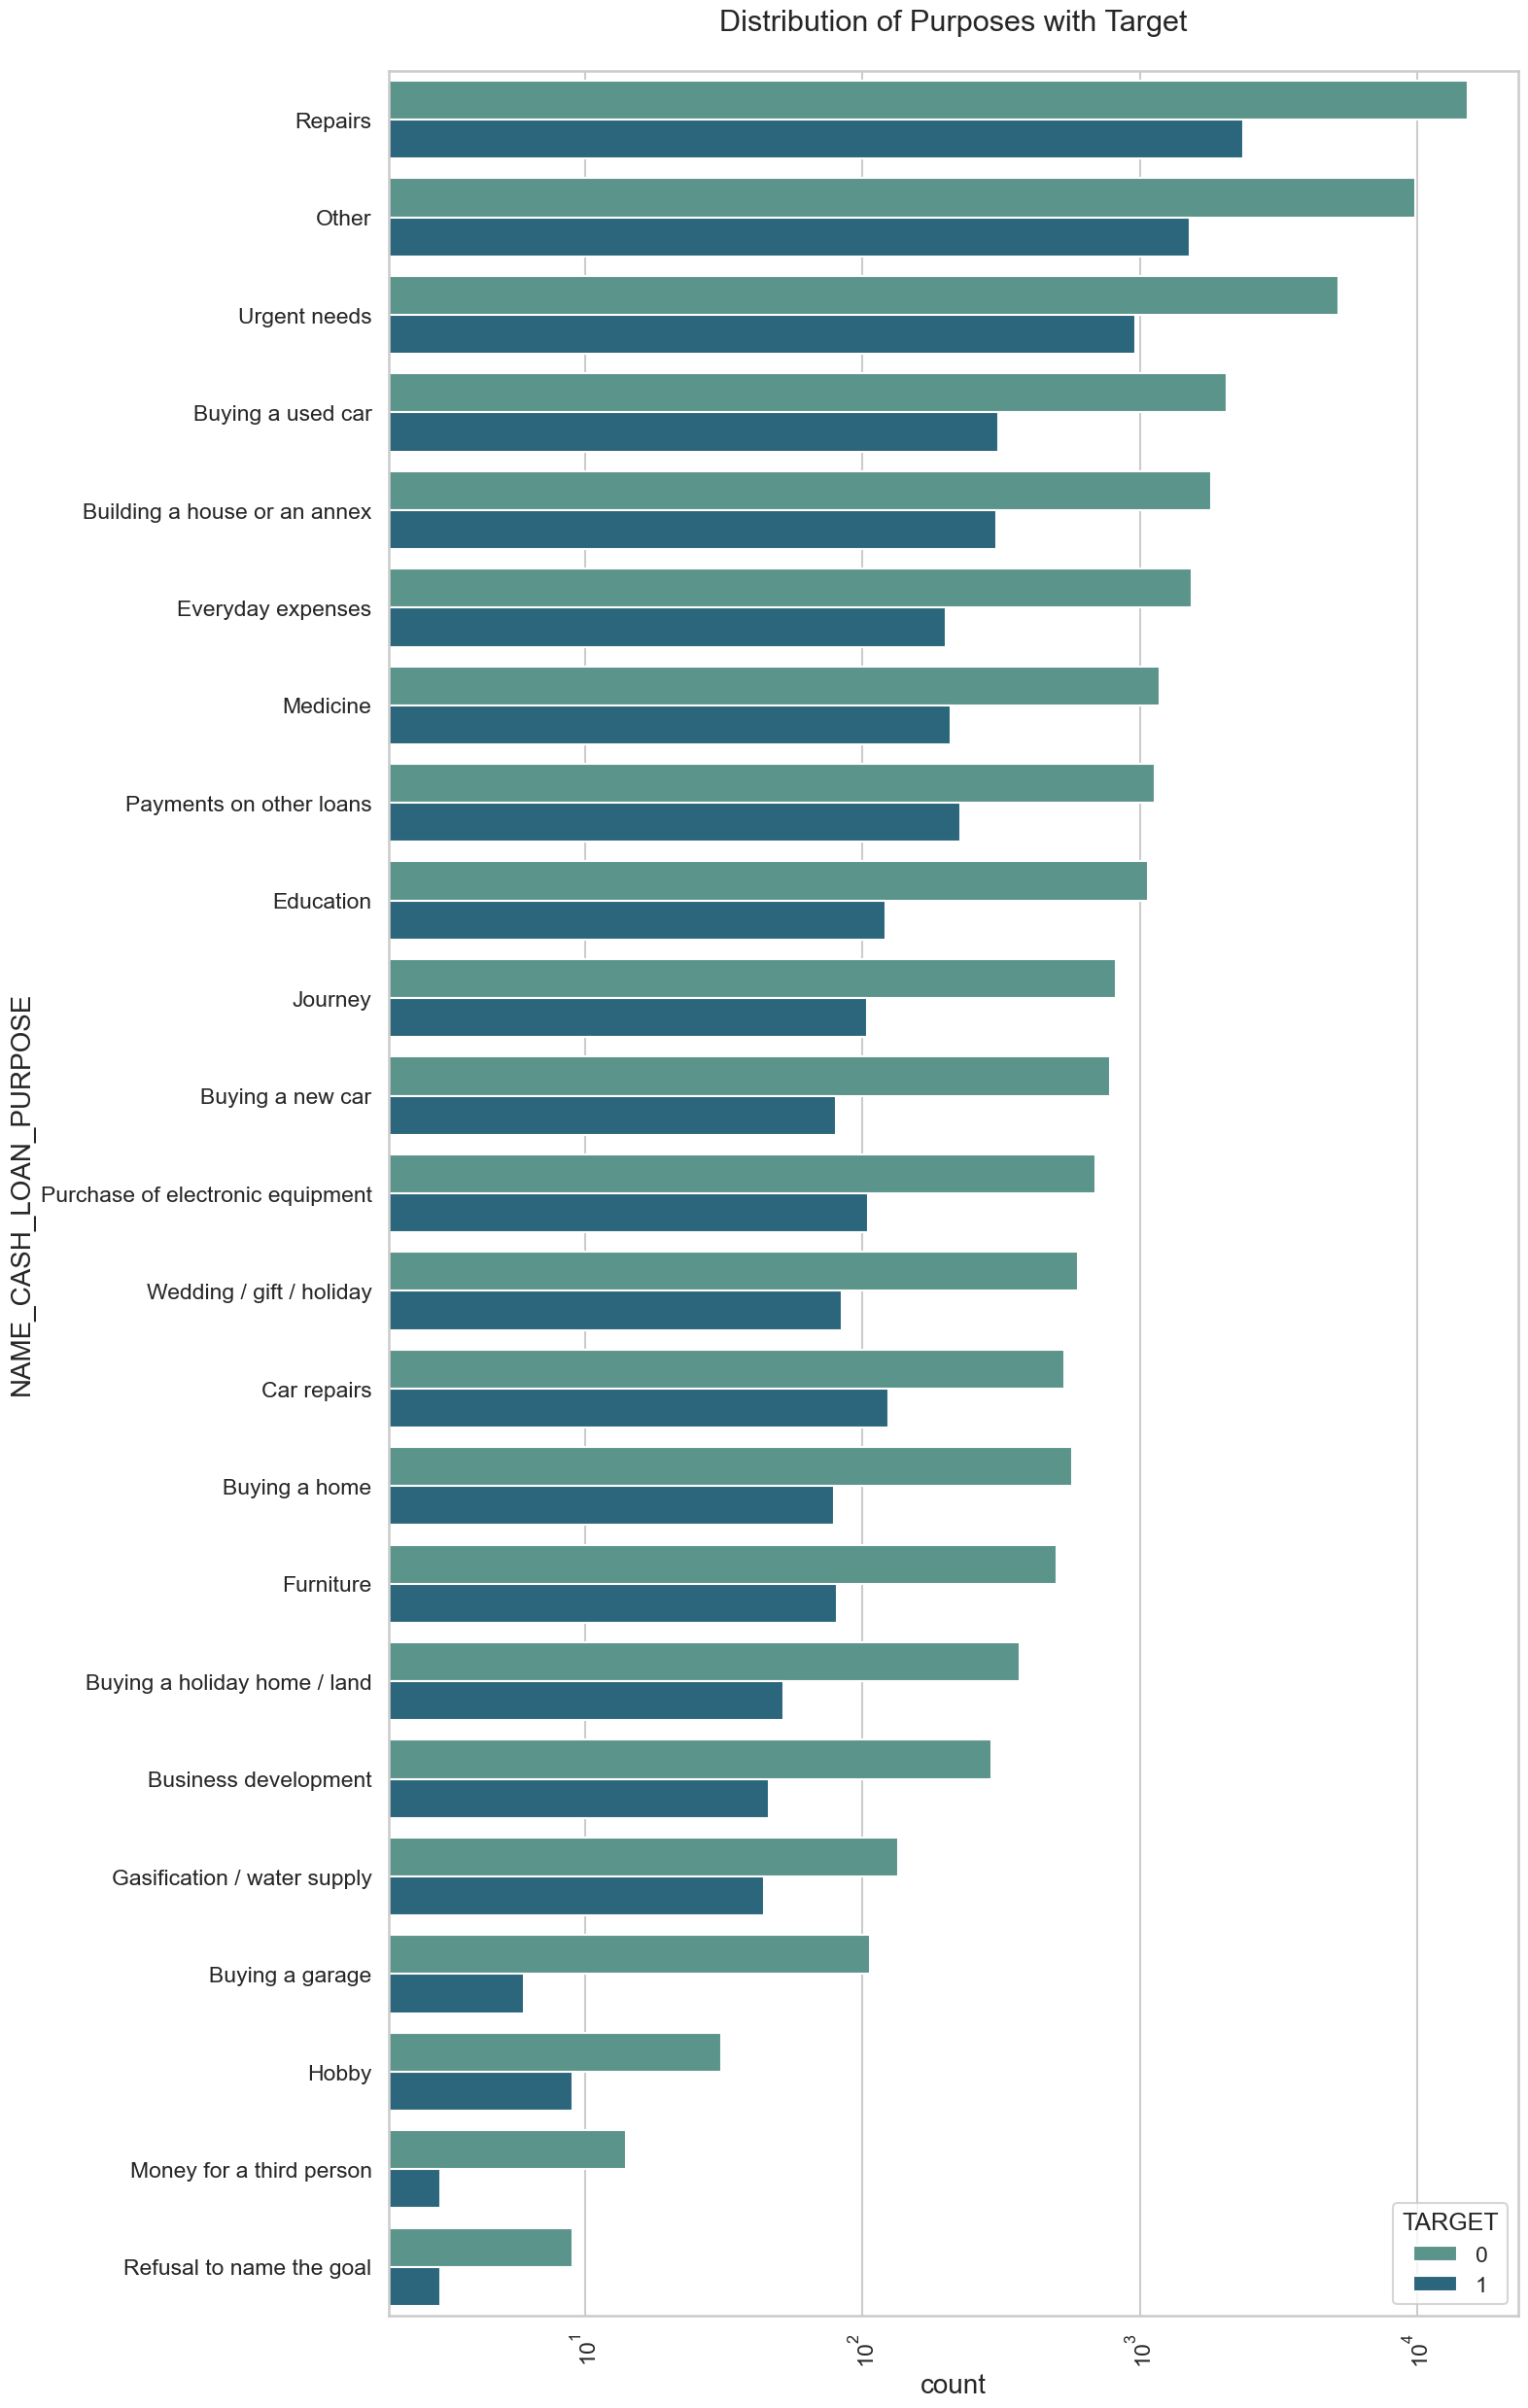

In [106]:
# Distribution of contract status

# Set Seaborn styles and plot settings
sns.set_style('whitegrid')
sns.set_context('talk')

# Create a figure with a specified size
plt.figure(figsize=(15, 30))

# Set label, title, and title padding settings
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Use a logarithmic scale for the x-axis
plt.xscale('log')

# Set the title
plt.title('Distribution of Purposes with Target')

# Create a countplot with specified data, columns, order, hue, and color palette
ax = sns.countplot(data=new_df1, y='NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index, 
                   hue='TARGET', palette='crest')


Based on the information provided from the plot, we can draw the following conclusions:

1. Loan applicants with the purpose of 'Repairs' tend to face more difficulties in making payments on time. This suggests that loans taken for repair-related expenses have a higher likelihood of payment difficulties.

2. Conversely, there are specific loan purposes where the payment is significantly higher than facing difficulties. These purposes include 'Buying a garage,' 'Business development,' 'Buying land,' 'Buying a new car,' and 'Education.' Clients who take loans for these purposes are more likely to make payments on time and have minimal payment difficulties.

These conclusions highlight the varying payment performance associated with different loan purposes, suggesting areas of focus for better payment outcomes.

#### BIvariant Analysis

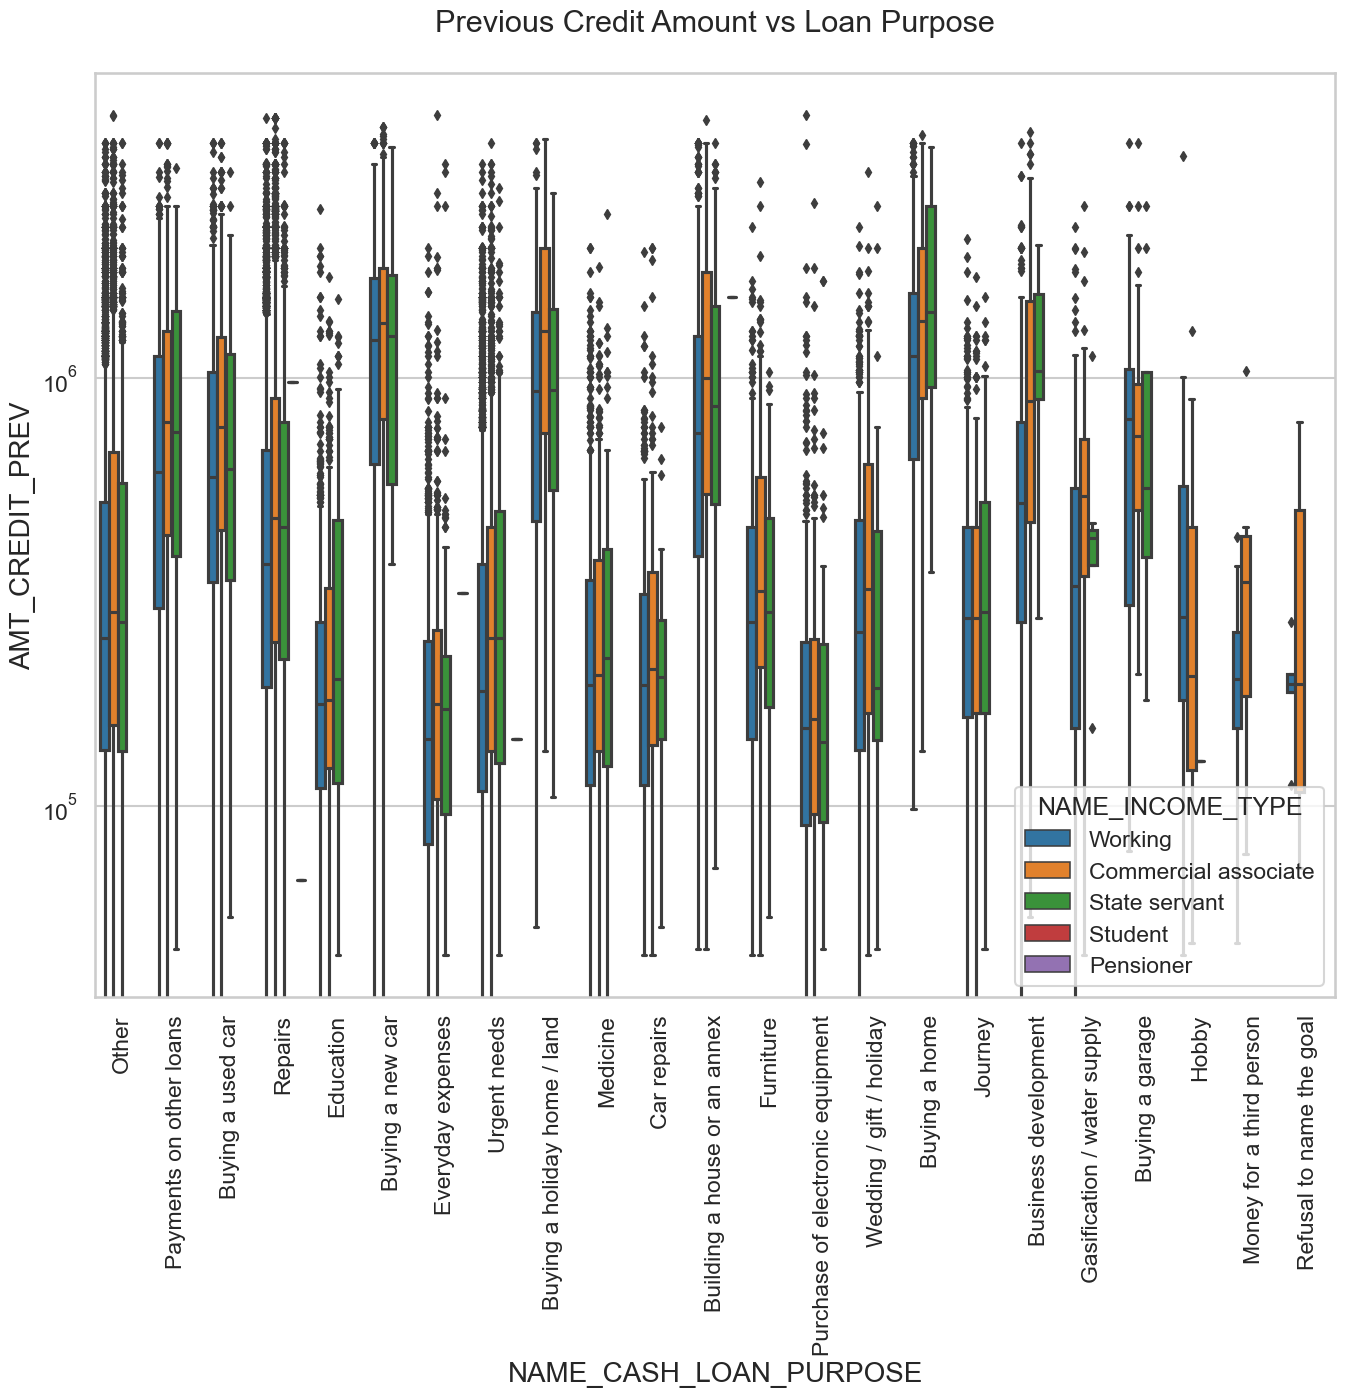

In [107]:
# Box plotting for Credit amount in logarithmic scale

# Create a figure with a specified size
plt.figure(figsize=(16, 12))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Use a logarithmic scale for the y-axis
plt.yscale('log')

# Create a boxplot with specified data, columns, hue, and orientation
sns.boxplot(data=new_df1, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v')

# Set the title
plt.title('Previous Credit Amount vs Loan Purpose')

# Show the plot
plt.show()


Based on the information provided in the analysis, we can draw the following conclusions:

1. Loan purposes such as 'Buying a home,' 'Buying land,' 'Buying a new car,' and 'Building a house' tend to have higher credit amounts. This suggests that clients seeking loans for these purposes require larger loan amounts.

2. Income type 'State servants' have a significant number of credit applications. This indicates that individuals with the 'State servants' income type are more likely to apply for credits.

3. Loan purposes related to 'Money for a third person' or 'Hobby' have fewer credit applications. This implies that these purposes are associated with a lower number of credit applicants compared to other purposes.

These conclusions provide insights into the relationships between loan purposes, income types, and credit amounts, helping to identify patterns and trends within the dataset.

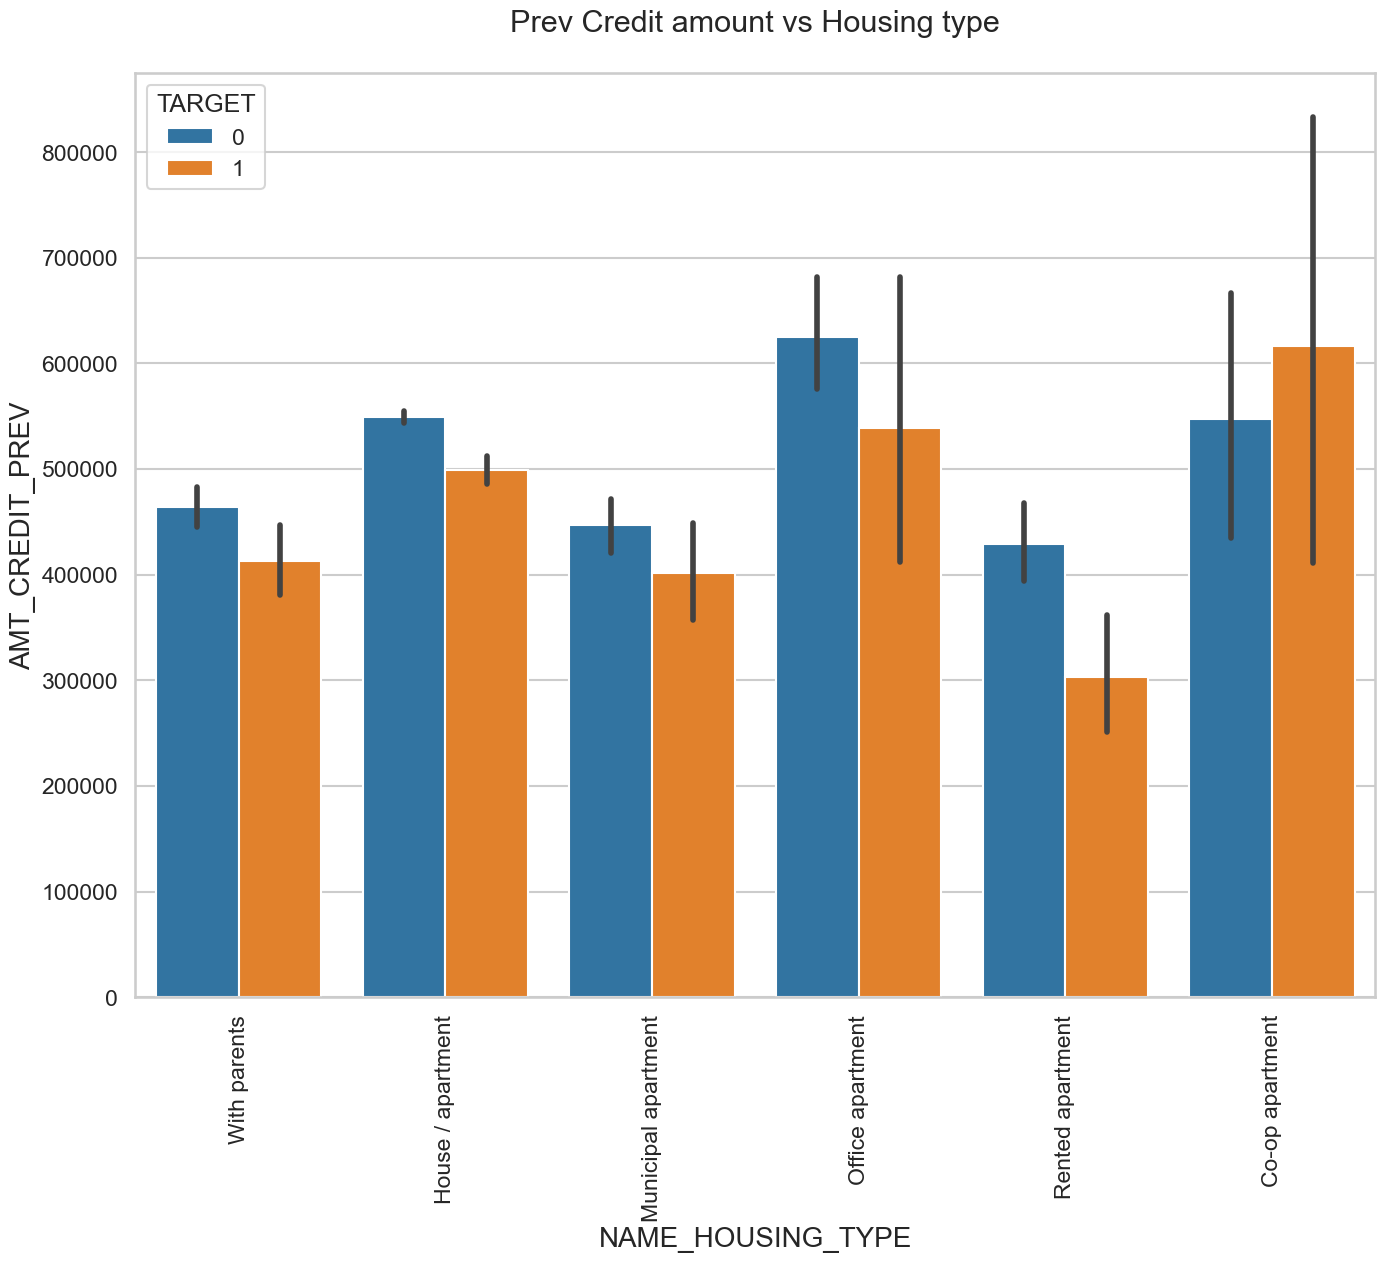

In [108]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Based on the analysis provided, we can draw the following conclusions:

1. For the 'Housing type' variable, 'Office apartment' is associated with a higher number of credits for target 0 (successful payments), while 'Co-op apartment' is associated with a higher number of credits for target 1 (payment difficulties).

2. Based on this information, it is advisable for the bank to exercise caution when considering loan applications for the 'Co-op apartment' housing type, as it appears to have a higher likelihood of payment difficulties.

3. Conversely, the bank can focus more on housing types such as 'With parents,' 'House/apartment,' or 'Municipal apartment,' as these housing types are associated with successful payments (target 0).

These conclusions provide guidance to the bank in making informed decisions about loan applications based on the applicant's housing type and the likelihood of successful payments.

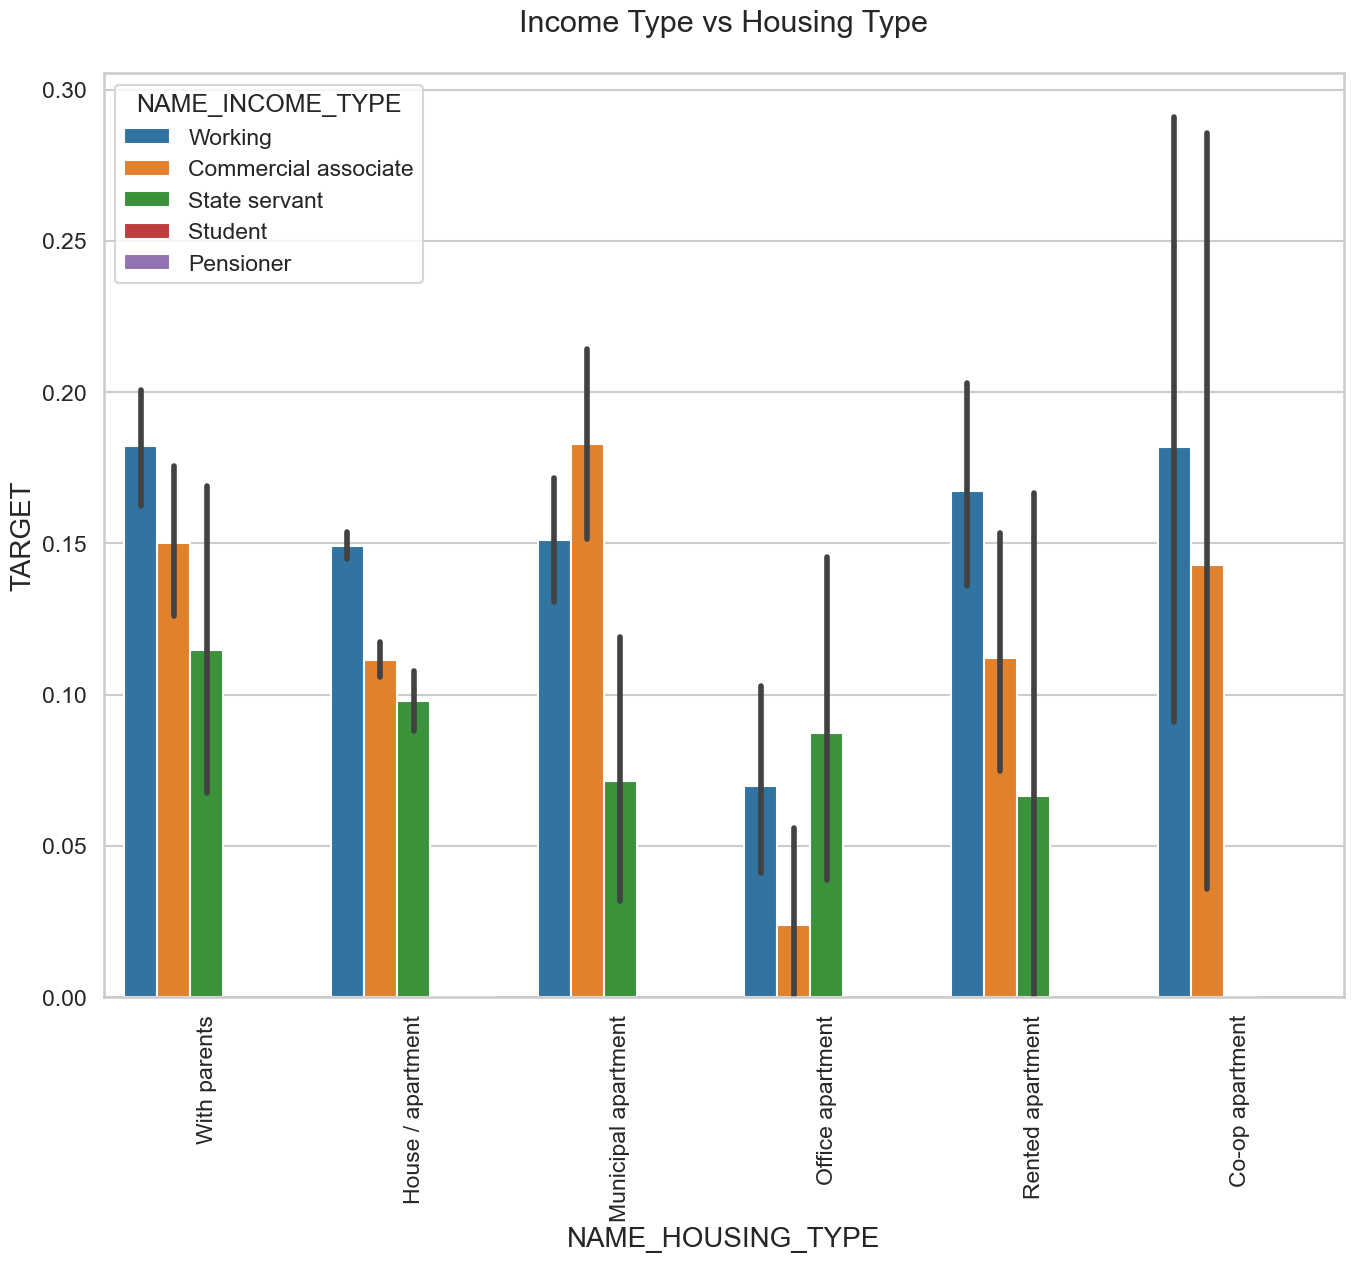

In [109]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='TARGET',hue='NAME_INCOME_TYPE',x='NAME_HOUSING_TYPE')
plt.title('Income Type vs Housing Type')
plt.show()

###  CONCLUSION


Based on the analysis, the following conclusions can be drawn:

1. Banks should be cautious with contract types 'Student,' 'Pensioner,' and 'Businessman' who have housing types as Office Apartments and co-apartment for loan approvals, as these combinations are associated with more unsuccessful payments.

2. Banks should Prioritize with clients with income type 'Working,' as they appear to have the highest number of successful payments. As they have a regular income.

3. Loan applications with the purpose of 'Repair' have a higher number of unsuccessful payments on time. Banks should assess such applications carefully and consider additional risk factors.

4. Banks may benefit from targeting clients with housing types such as 'With parents,' as this category has the lowest number of unsuccessful payments. Attracting more clients from this housing type may lead to a higher rate of successful payments.

These conclusions provide insights into factors that can influence the success of loan payments and help banks make informed decisions regarding loan approvals and risk assessment.